# House Price Prediction

### Steps
1. Acquire the data
2. Explore the data
3. Engineer and transform the features and the target variable
3. Build a model
4. Make and submit predictions
5. Improve our model

In [422]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [423]:
train=pd.read_csv('Data/train.csv')
test=pd.read_csv('Data/test.csv')

In [424]:
print ("Train data shape:", train.shape)
print ("Test data shape:", test.shape)

Train data shape: (1460, 81)
Test data shape: (1459, 80)


In [425]:
import matplotlib.pyplot as plt
plt.style.use(style='ggplot')
plt.rcParams['figure.figsize'] = (10, 6)

In [426]:
#Target Varriable t

train.SalePrice.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

(array([148., 723., 373., 135.,  51.,  19.,   4.,   3.,   2.,   2.]),
 array([ 34900., 106910., 178920., 250930., 322940., 394950., 466960.,
        538970., 610980., 682990., 755000.]),
 <a list of 10 Patch objects>)

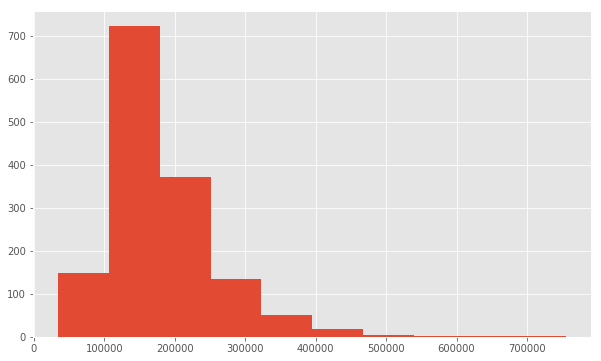

In [427]:
plt.hist(train.SalePrice)

The average sale price of a house in our dataset is close to 180,000 with most of the values falling within the 130,000 to 215,000 range.

## Skewness

Skew is: 1.8828757597682129


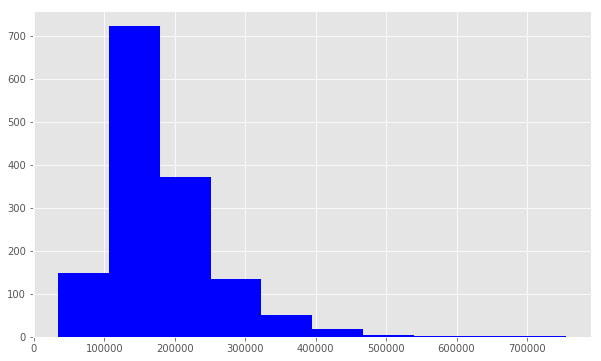

In [428]:
print ("Skew is:", train.SalePrice.skew())
plt.hist(train.SalePrice, color='blue')
plt.show()

Transformation: log-transform the target variable
Reason        : reduce skewness
Effest        : improve the linearity of the data. 

the predictions generated by the final model will also be log-transformed, so we’ll need to convert these predictions back to their original form later.

np.log() will transform the variable, and np.exp() will reverse the transformation.

The distribution is positively skewed.

Skew is: 0.12133506220520406


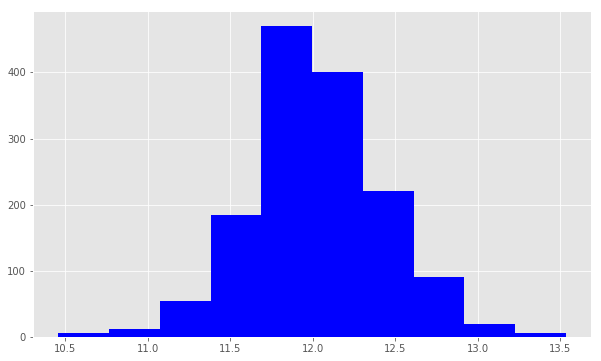

In [429]:
target = np.log(train.SalePrice)
print ("Skew is:", target.skew())
plt.hist(target, color='blue')
plt.show()

improved the skewness of the data.

## Numerical Features

In [430]:
numeric_features = train.select_dtypes(include=['int64','float64'])
numeric_features.dtypes

Id                 int64
MSSubClass         int64
LotFrontage      float64
LotArea            int64
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
MasVnrArea       float64
BsmtFinSF1         int64
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
1stFlrSF           int64
2ndFlrSF           int64
LowQualFinSF       int64
GrLivArea          int64
BsmtFullBath       int64
BsmtHalfBath       int64
FullBath           int64
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
TotRmsAbvGrd       int64
Fireplaces         int64
GarageYrBlt      float64
GarageCars         int64
GarageArea         int64
WoodDeckSF         int64
OpenPorchSF        int64
EnclosedPorch      int64
3SsnPorch          int64
ScreenPorch        int64
PoolArea           int64
MiscVal            int64
MoSold             int64
YrSold             int64
SalePrice          int64
dtype: object

In [431]:
numeric_features.isnull().sum().sort_values(ascending=False)

LotFrontage      259
GarageYrBlt       81
MasVnrArea         8
BsmtFinSF1         0
LowQualFinSF       0
2ndFlrSF           0
1stFlrSF           0
TotalBsmtSF        0
BsmtUnfSF          0
BsmtFinSF2         0
SalePrice          0
BsmtFullBath       0
YearRemodAdd       0
YearBuilt          0
OverallCond        0
OverallQual        0
LotArea            0
MSSubClass         0
GrLivArea          0
BsmtHalfBath       0
YrSold             0
FullBath           0
MoSold             0
MiscVal            0
PoolArea           0
ScreenPorch        0
3SsnPorch          0
EnclosedPorch      0
OpenPorchSF        0
WoodDeckSF         0
GarageArea         0
GarageCars         0
Fireplaces         0
TotRmsAbvGrd       0
KitchenAbvGr       0
BedroomAbvGr       0
HalfBath           0
Id                 0
dtype: int64

Only 3 numerical features has null values namely-
1. LotFrontage   : Linear feet of street connected to property
2. GarageYrbuilt : The year in which garage was built
3. MaaVnrArea    : Massonry veener type

In [432]:
corr = numeric_features.corr()
print (corr['SalePrice'].sort_values(ascending=False))

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

In [433]:
numeric_features.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


##### 1. Overall Quality

In [434]:
quality_pivot = train.pivot_table(index='OverallQual',values='SalePrice')
quality_pivot

,SalePrice
OverallQual,
1,50150.000000
2,51770.333333
3,87473.750000
4,108420.655172
5,133523.347607
6,161603.034759
7,207716.423197
8,274735.535714
9,367513.023256


In [435]:
quality_pivot = train.pivot_table(index='OverallQual',values='SalePrice', aggfunc=np.median)
quality_pivot

,SalePrice
OverallQual,
1,50150
2,60000
3,86250
4,108000
5,133000
6,160000
7,200141
8,269750
9,345000


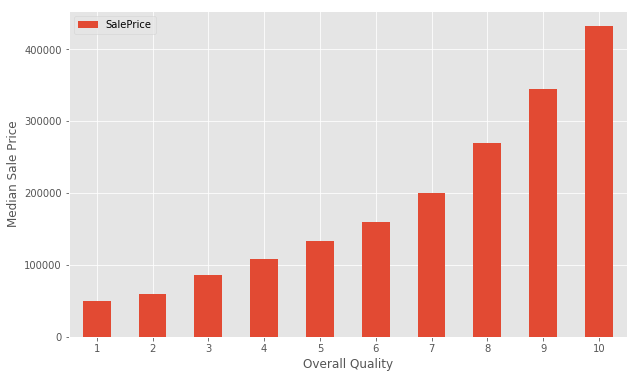

In [436]:
quality_pivot.plot(kind='bar')
plt.xlabel('Overall Quality')
plt.ylabel('Median Sale Price')
plt.xticks(rotation=0)
plt.show()

the median sales price strictly increases as Overall Quality increases.

##### 2. Ground Living Area

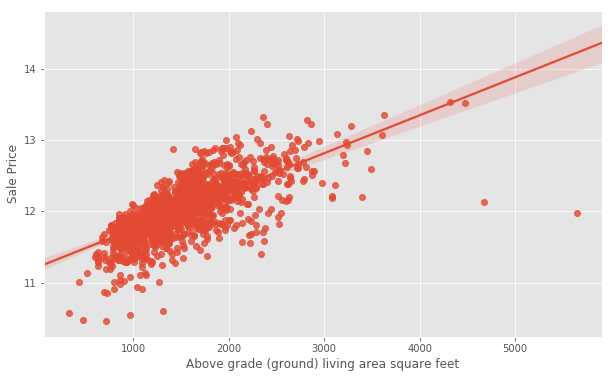

In [437]:
sns.regplot(x=train['GrLivArea'], y=target)
plt.ylabel('Sale Price')
plt.xlabel('Above grade (ground) living area square feet')
plt.show()

increases in living area correspond to increases in price, further there are two outliers in the right side.

##### 3. Garage Car

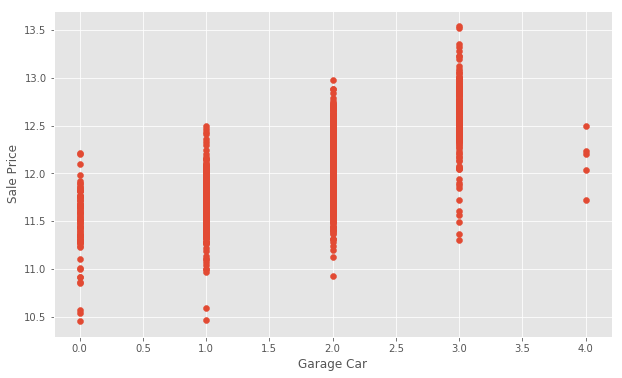

In [438]:
plt.scatter(x=train['GarageCars'],y=target)
plt.xlabel('Garage Car')
plt.ylabel('Sale Price')
plt.show()

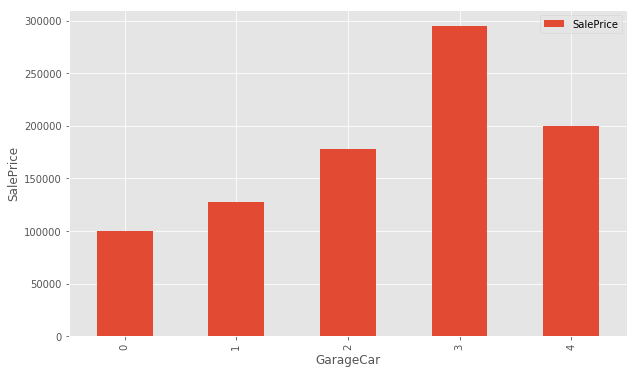

In [439]:
garagecar_pivot=train.pivot_table(index='GarageCars',values='SalePrice',aggfunc=np.median)

garagecar_pivot.plot(kind='bar')
plt.xlabel('GarageCar')
plt.ylabel('SalePrice')
plt.show()

##### 4. Garage Area

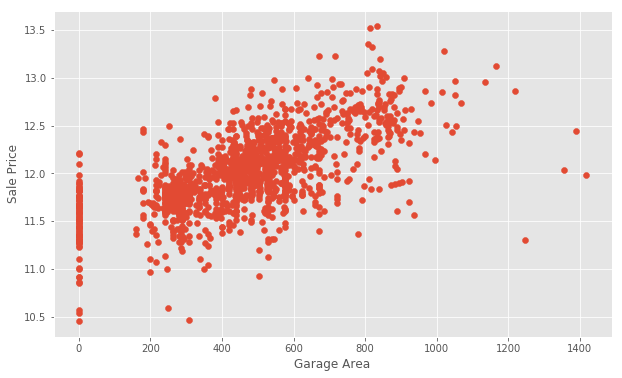

In [440]:
plt.scatter(x=train['GarageArea'], y=target)
plt.ylabel('Sale Price')
plt.xlabel('Garage Area')
plt.show()

There are some outliers in the right side of 1200 garage are

### Removing Outliers

###### 1. GrLIvArea

In [441]:
train=train.drop(train[(train['GrLivArea']>4000) & (train['SalePrice']<300000)].index)

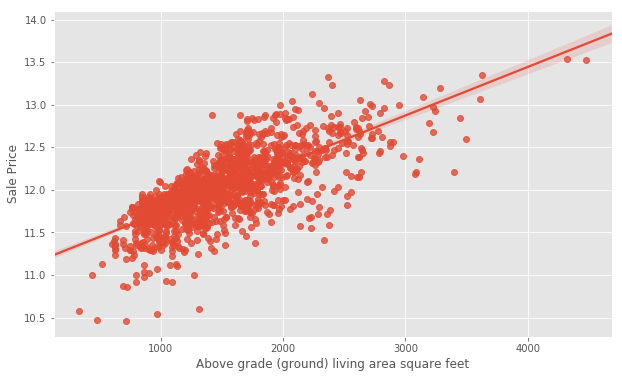

In [442]:
sns.regplot(x=train['GrLivArea'], y=np.log(train['SalePrice']))
plt.ylabel('Sale Price')
plt.xlabel('Above grade (ground) living area square feet')
plt.show()

No outliers

###### 2.Garage Area

In [443]:
train=train.drop(train[train['GarageArea']>1200].index)

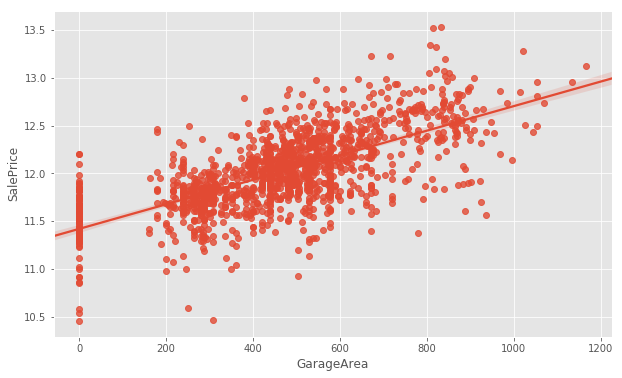

In [444]:
sns.regplot(x=train.GarageArea,y=np.log(train.SalePrice))
plt.xlabel('GarageArea')
plt.ylabel('SalePrice')
plt.show()

No outliers

# Categorical Features

In [445]:
def findCatFeatures(data): 
    categorical_features=data.select_dtypes(include='object')
    return categorical_features

In [446]:
categorical_features=findCatFeatures(train)
len(categorical_features.columns)

43

We will use one hot encoding for make use of information for modelling

### Transforming and feature engineering

any feature engineering that occurred while working on the train data should be applied again on the test set.

##### 1. Street

Contains only 2 unique values, and are very imbalanced, so we will drop this feature


In [447]:
train.Street.value_counts()

Pave    1449
Grvl       5
Name: Street, dtype: int64

In [448]:
#Train Data
train.drop(['Street'],axis=1,inplace=True)

In [449]:
#Test Data
test.drop(['Street'],axis=1,inplace=True)

In [450]:
categorical_features=findCatFeatures(train)
len(categorical_features.columns)

42

##### 2. Sale Condition

In [451]:
train.SaleCondition.value_counts()

Normal     1196
Partial     121
Abnorml     101
Family       20
Alloca       12
AdjLand       4
Name: SaleCondition, dtype: int64

In [452]:
condition_pivot = train.pivot_table(index='SaleCondition', values='SalePrice', aggfunc=np.median)
condition_pivot

,SalePrice
SaleCondition,
Abnorml,130000
AdjLand,104000
Alloca,148145
Family,140500
Normal,160000
Partial,244600


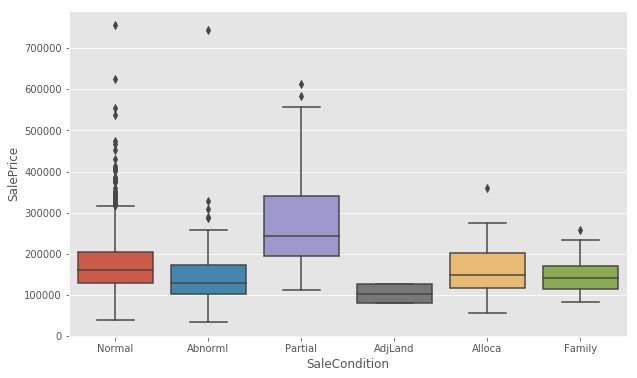

In [453]:
sns.boxplot(train.SaleCondition,train.SalePrice)

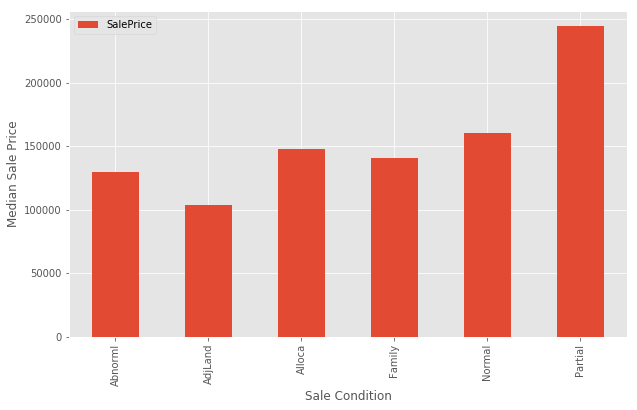

In [454]:
condition_pivot.plot(kind='bar')
plt.xlabel('Sale Condition')
plt.ylabel('Median Sale Price')
plt.show()

Partial has a significantly higher Median Sale Price than the others. We will encode this as a new feature. We select all of the houses where SaleCondition is equal to Patrial and assign the value 1, otherwise assign 0.

In [455]:
#Before encoding we check about the nullity of the varriable
print(train.SaleCondition.isnull().sum())
print(test.SaleCondition.isnull().sum())

0
0


In [456]:
def encode(x):
    if x=='Partial':
        return 1
    else:
        return 0
    
train['enc_SaleCondition']=train.SaleCondition.apply(encode)
test['enc_SaleCondition']=test.SaleCondition.apply(encode)


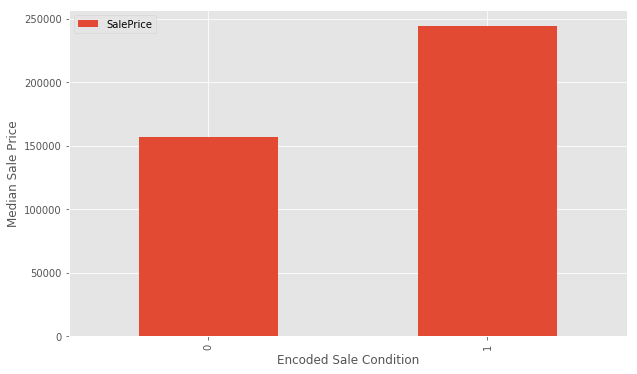

In [457]:
condition_pivot = train.pivot_table(index='enc_SaleCondition', values='SalePrice', aggfunc=np.median)
condition_pivot.plot(kind='bar')
plt.xlabel('Encoded Sale Condition')
plt.ylabel('Median Sale Price')
plt.show()

In [458]:
train=train.drop('SaleCondition',axis=1)

In [459]:
test=test.drop('SaleCondition',axis=1)

In [460]:
categorical_features=findCatFeatures(train)
len(categorical_features.columns)

41

# Train : Removing Null Values
 

# 1. Categorical Values

In [461]:
# Checking null values

null=pd.DataFrame(train.isnull().sum().sort_values(ascending=False))
null.columns=['Null Count']
null.index.name='Features'
null=null.drop(null[null['Null Count']<=0].index)

null

,Null Count
Features,
PoolQC,1448
MiscFeature,1401
Alley,1363
Fence,1173
FireplaceQu,689
LotFrontage,258
GarageType,81
GarageCond,81
GarageFinish,81


### 1. Pool

In [462]:
#Pool
(train[train['PoolArea']<=0].PoolArea).count()
#So  Pool quality is null where pool area is 0

1448

In [463]:
#PoolQC (Train)
train.loc[train.PoolArea==0,'PoolQC']='NoPool'

In [464]:
#Test
#test.loc[test.PoolArea==0,'PoolQC']='NoPool'

In [465]:
train.PoolQC.value_counts()

NoPool    1448
Ex           2
Gd           2
Fa           2
Name: PoolQC, dtype: int64

### 2. Garage

In [466]:
#Garage Area
train[train['GarageArea']<=0].GarageArea.count()
#So Garage related quatities are null when GarageArea =0

81

In [467]:
#Garage
train.loc[train.GarageArea==0,['GarageQual','GarageCond','GarageType','GarageFinish']]='NoGarage'


In [468]:
#TEST
#test.loc[test.GarageArea==0,['GarageQual','GarageCond','GarageType','GarageFinish']]='NoGarage'


### 3. Basement

In [469]:
#Basement
train.loc[train.TotalBsmtSF==0,['BsmtQual','BsmtCond','BsmtFinType1','BsmtFinType2','BsmtExposure']]='NoBasment'

In [470]:
#Houses which have 1 basment but not 2nd
train.BsmtFinType2.fillna('NoBasment',inplace=True)


In [471]:
#BsmtExposure: Refers to walkout or garden level walls
train.BsmtExposure.fillna('NoBasment',inplace=True)


In [472]:
#TEST
#test.loc[test.TotalBsmtSF==0,['BsmtQual','BsmtCond','BsmtFinType1','BsmtFinType2','BsmtExposure']]='NoBasment'
#test.BsmtFinType2.fillna('NoBasment',inplace=True)
#test.BsmtExposure.fillna('NoBasment',inplace=True)


### 4. Firplaces

In [473]:
#Firplaces
(train[train['Fireplaces']==0].Fireplaces).count()

689

In [474]:
#Fireplace quality
train.loc[train['Fireplaces']==0,'FireplaceQu']='NoFireplace'


In [475]:
#(test[test['Fireplaces']==0].Fireplaces).count()
#test.loc[test['Fireplaces']==0,'FireplaceQu']='NoFirplace'


### 5. Miscellaneous Features

In [476]:
#Miscellaneous Features
train.MiscFeature.fillna('NoMiscFeatures',inplace=True)


In [477]:
#test.MiscFeature.fillna('NoMiscFeatures',inplace=True)


### 6. Fence

In [478]:
train.Fence.fillna('NoFence',inplace=True)


In [479]:
#test.Fence.fillna('NoFence',inplace=True)


### 7. Electrical

In [480]:
value=train.Electrical.mode()
value
#SBrkr=Standard Ciruit Breaker and Romex

0    SBrkr
dtype: object

In [481]:
train.Electrical.fillna('SBrkr',inplace=True)


In [482]:
#test.Electrical.fillna('SBrkr',inplace=True)


### 8. Alley

In [483]:
train.Alley.fillna('NoAlley',inplace=True)


In [484]:
#test.Alley.fillna('NoAlley',inplace=True)

### 9. Masonry

In [485]:
train.MasVnrType.unique()

array(['BrkFace', 'None', 'Stone', 'BrkCmn', nan], dtype=object)

In [486]:
train.MasVnrType.fillna('None',inplace=True)


In [487]:
#test.MasVnrType.fillna('None',inplace=True)


as MasVnrType and MasVnrArea are becoming null together, we can infer that masonry is absent so we will equate
1. MasVnrType=None
2. MasVnrArea=0

# 2. Numeric Values

In [488]:
# Checking null values

null=pd.DataFrame(train.isnull().sum().sort_values(ascending=False))
null.columns=['Null Count']
null.index.name='Features'
null=null.drop(null[null['Null Count']<=0].index)

null

,Null Count
Features,
LotFrontage,258
GarageYrBlt,81
MasVnrArea,8


### 1. Massonry

In [489]:
train.MasVnrArea.fillna(0,inplace=True)

In [490]:
#test.MasVnrArea.fillna(0,inplace=True)

### 2. LotFrontage
Linear feet of street connected to property

In [491]:
train[train['LotFrontage']==0].LotFrontage.count()

0

In [492]:
train.LotFrontage.fillna(0,inplace=True)

In [493]:
train[train['LotFrontage']==0].LotFrontage.count()

258

In [494]:
#test.LotFrontage.fillna(0,inplace=True)

### 3. GarageYrBlt

In [495]:
train.GarageYrBlt.value_counts().count()

97

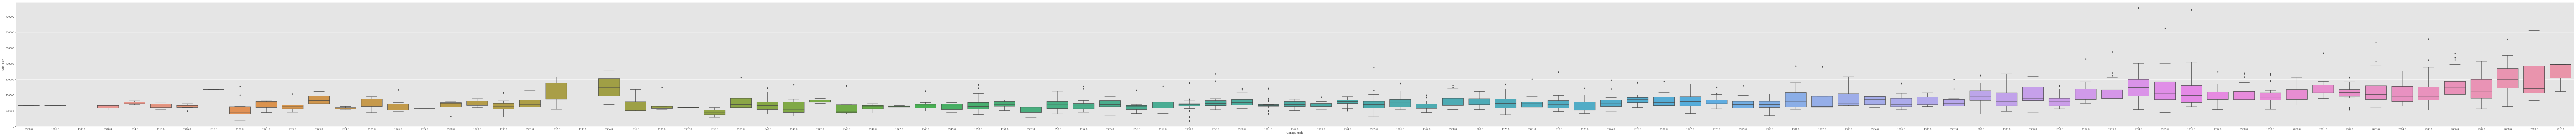

In [505]:
plt.figure(figsize=(200,10))
sns.boxplot(train.GarageYrBlt,train.SalePrice)

In [500]:
condition_pivot = train.pivot_table(index='GarageYrBlt', values='SalePrice')

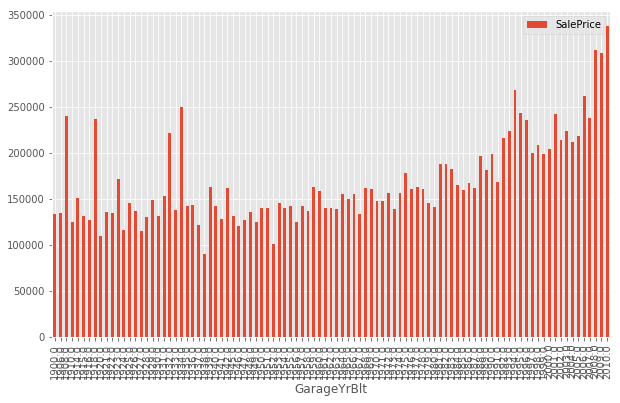

In [501]:
condition_pivot.plot(kind='bar')

In [420]:
value=train.GarageYrBlt.mean()

In [421]:
train.GarageYrBlt.fillna(value,inplace=True)

In [79]:
# Checking null values

null=pd.DataFrame(train.isnull().sum().sort_values(ascending=False))
null.columns=['Null Count']
null.index.name='Features'
null=null.drop(null[null['Null Count']<=0].index)

null

,Null Count
Features,


# Test : Remove null values

In [80]:
testNull=pd.DataFrame(test.isnull().sum().sort_values(ascending=False))
testNull.columns=['NullCount']
testNull.index.name='features'
testNull=testNull.drop(testNull[testNull['NullCount']<=0].index)

testNull

,NullCount
features,
PoolQC,1456
MiscFeature,1408
Alley,1352
Fence,1169
FireplaceQu,730
LotFrontage,227
GarageCond,78
GarageFinish,78
GarageYrBlt,78


In [81]:
import missingno as msno

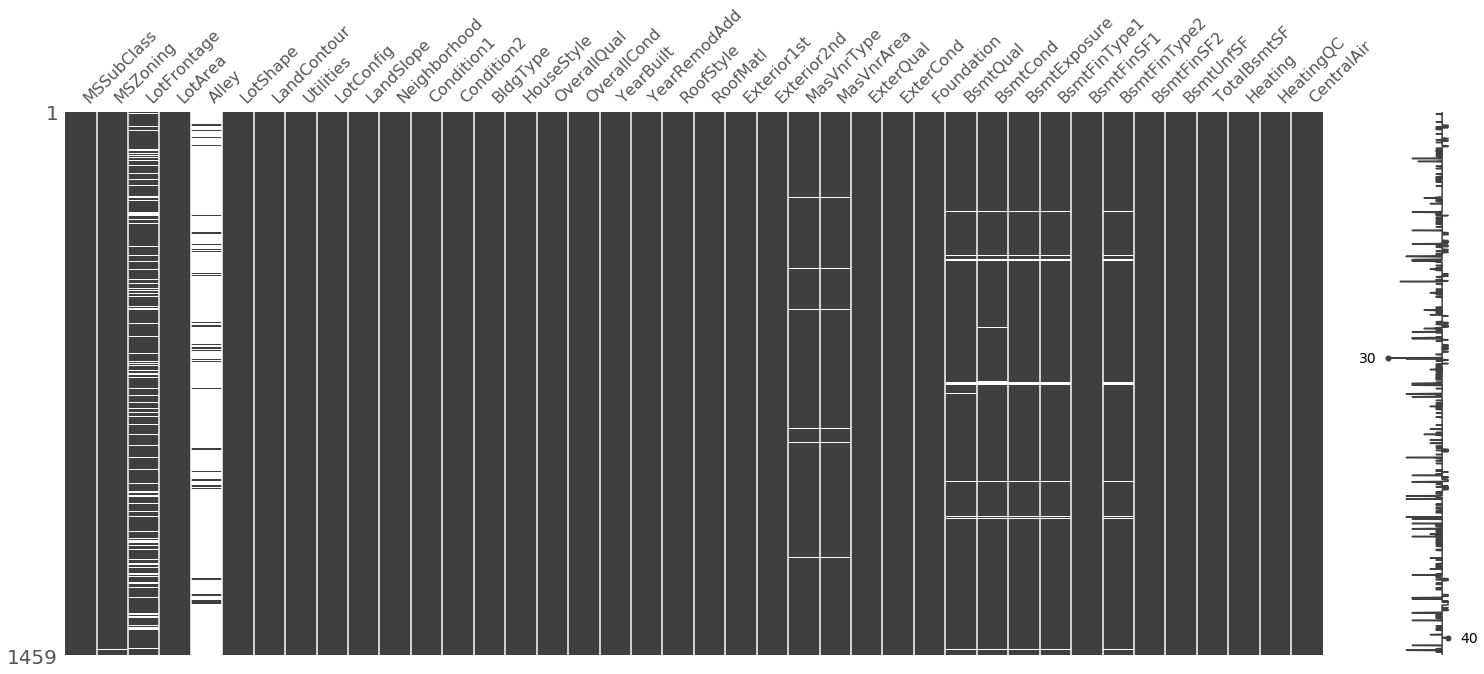

In [82]:
msno.matrix(test.iloc[:,1:41])

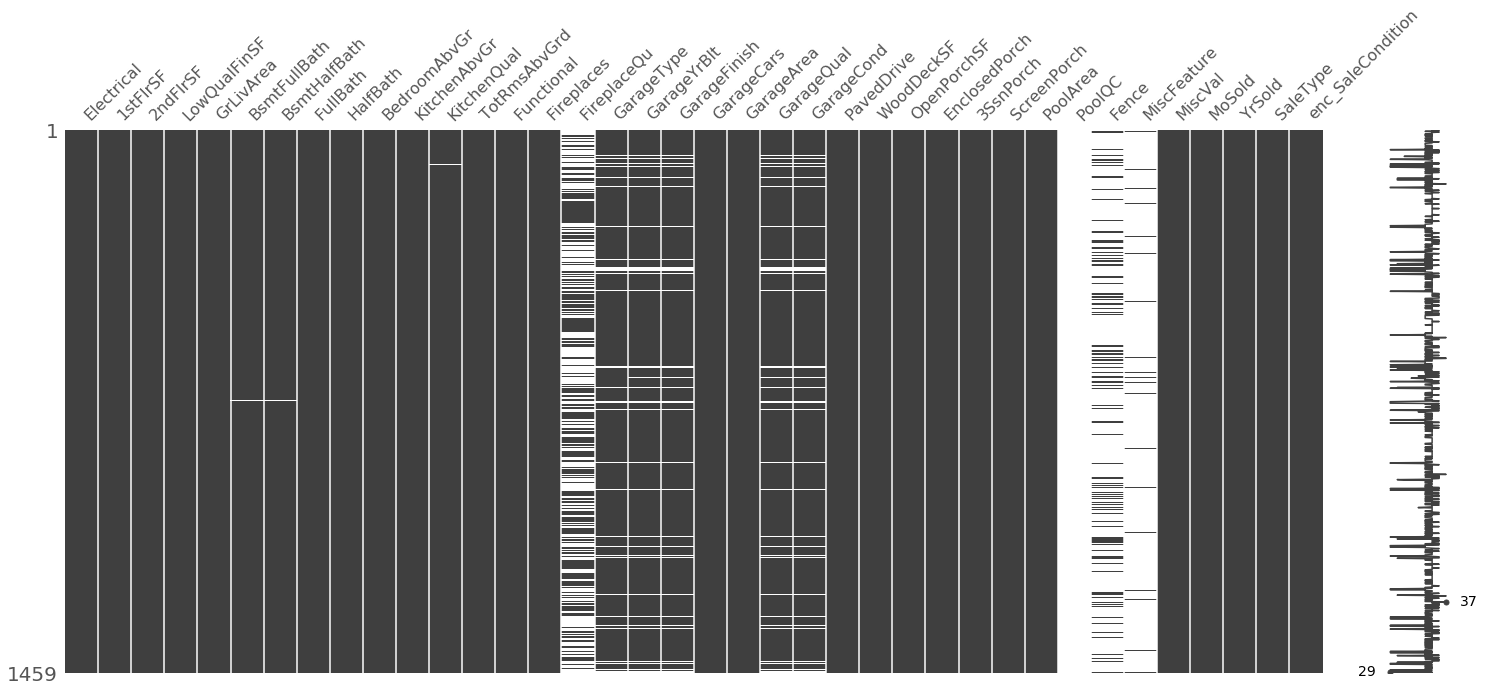

In [83]:
msno.matrix(test.iloc[:,41:])

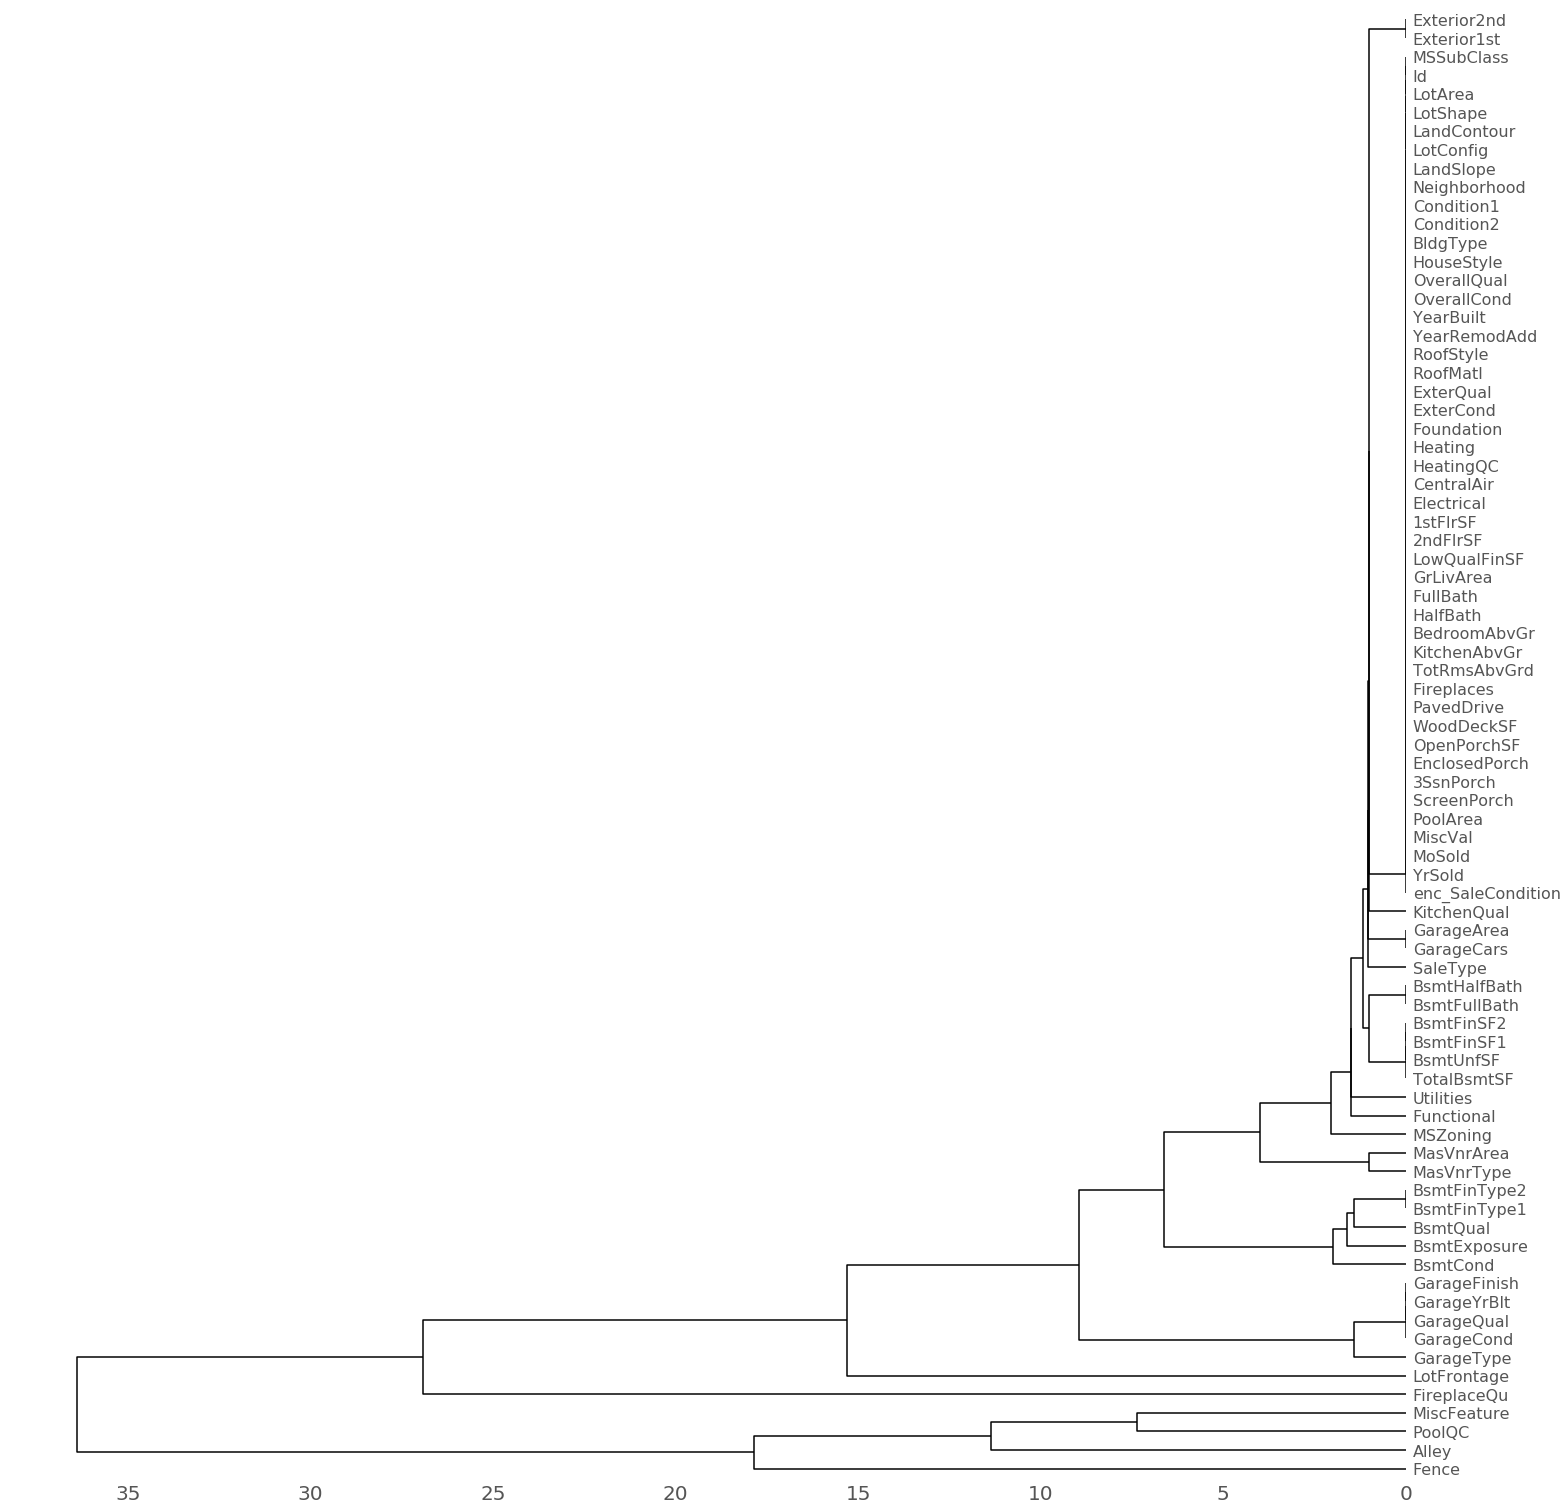

In [84]:
msno.dendrogram(test)

In [85]:
test[test['Fireplaces']<=0].Fireplaces.count()

730

In [86]:
test.FireplaceQu.fillna('NoFireplace',inplace=True)


In [87]:
#Pool
test.PoolQC.fillna('NoPool',inplace=True)

In [88]:
#Miscellaneous Features
test.MiscFeature.fillna('NoMiscFeatures',inplace=True)

In [89]:
#Alley
test.Alley.fillna('NoAlley',inplace=True)

In [90]:
#Fencing
test.Fence.fillna('NoFence',inplace=True)

In [91]:
#Lot Frontage
test.LotFrontage.fillna(0,inplace=True)

In [92]:
#Garage
test.GarageCond.fillna('NoGarage',inplace=True)
test.GarageFinish.fillna('NoGarage',inplace=True)
test.GarageQual.fillna('NoGarage',inplace=True)
test.GarageType.fillna('NoGarage',inplace=True)

In [93]:
#GarageYrBlt
value=test.GarageYrBlt.mean()
test.GarageYrBlt.fillna(value,inplace=True)

In [94]:
#Basment
test.BsmtCond.fillna('NoBasment',inplace=True)
test.BsmtExposure.fillna('NoBasment',inplace=True)
test.BsmtQual.fillna('NoBasment',inplace=True)
test.BsmtFinType1.fillna('NoBasment',inplace=True)
test.BsmtFinType2.fillna('NoBasment',inplace=True)

In [95]:
#Masonry
test.MasVnrType.fillna('None',inplace=True)
test.MasVnrArea.fillna(0,inplace=True)

In [96]:
testNull=pd.DataFrame(test.isnull().sum().sort_values(ascending=False))
testNull.columns=['NullCount']
testNull=testNull.drop(testNull[testNull['NullCount']<=0].index)

testNull

,NullCount
MSZoning,4
Functional,2
BsmtFullBath,2
Utilities,2
BsmtHalfBath,2
KitchenQual,1
BsmtFinSF1,1
Exterior1st,1
Exterior2nd,1
GarageCars,1


In [97]:
# Fill na which are left by mistake

def fillMistakeNull(data,col):
    if data[col].dtype==np.int64 or data[col].dtype==np.float64 :
        nullvalue=data[col].mean()
        data[col].fillna(nullvalue,inplace=True)
    else:
        nullvalue=data[col].mode()
        nullvalue=nullvalue[0]
        data[col].fillna(nullvalue,inplace=True)
        

In [98]:
for i in range(len(testNull)):
    col=testNull.iloc[i].name
    fillMistakeNull(test,col)

In [99]:
testNull=pd.DataFrame(test.isnull().sum().sort_values(ascending=False))
testNull.columns=['NullCount']
testNull.index.name='Features'
testNull.drop(testNull[testNull['NullCount']<=0].index,inplace=True)

testNull

,NullCount
Features,


# Encoding

In [100]:
categorical_features=findCatFeatures(train)
cat_features_col=categorical_features.columns
len(cat_features_col)

41

## 1. Removal of Unnecessary features

The features which are extremly imbalanced are removed

In [101]:
for col in cat_features_col:
    print(train[col].value_counts())
    print('\n')

RL         1146
RM          218
FV           65
RH           16
C (all)       9
Name: MSZoning, dtype: int64


NoAlley    1363
Grvl         50
Pave         41
Name: Alley, dtype: int64


Reg    921
IR1    483
IR2     41
IR3      9
Name: LotShape, dtype: int64


Lvl    1309
Bnk      61
HLS      50
Low      34
Name: LandContour, dtype: int64


AllPub    1453
NoSeWa       1
Name: Utilities, dtype: int64


Inside     1047
Corner      262
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64


Gtl    1377
Mod      64
Sev      13
Name: LandSlope, dtype: int64


NAmes      225
CollgCr    150
OldTown    113
Edwards     98
Somerst     86
Gilbert     79
NridgHt     75
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     48
NoRidge     41
Timber      38
IDOTRR      36
ClearCr     28
SWISU       25
StoneBr     25
Blmngtn     17
MeadowV     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64


Norm

In [102]:
train.drop(['Utilities','Condition2','RoofMatl','Heating','PoolQC','MiscFeature'],axis=1,inplace=True)


In [103]:
test.drop(['Utilities','Condition2','RoofMatl','Heating','PoolQC','MiscFeature'],axis=1,inplace=True)

In [104]:
categorical_features=findCatFeatures(train)
cat_features_col=categorical_features.columns
len(cat_features_col)
#Successfully Removed

35

## 2. Label Encoding
Categorical features which can be ranked are label encoded.

In [105]:
#Confusing- Lot shape:

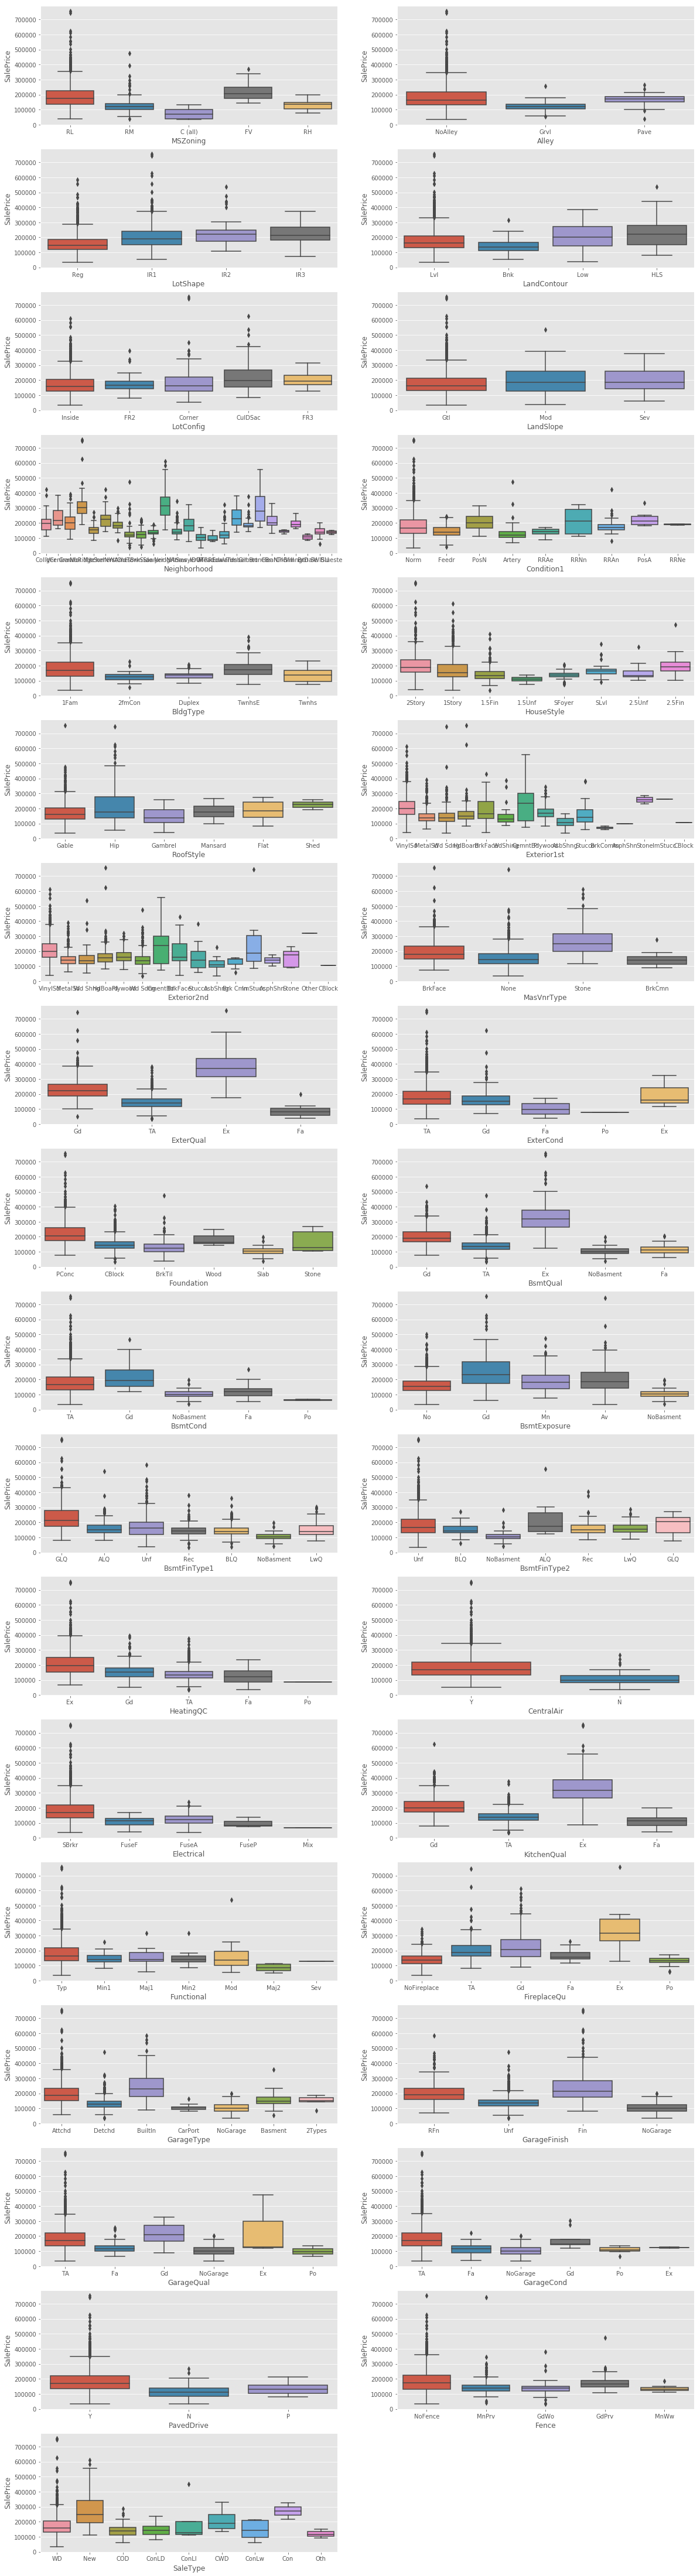

In [106]:
#Boxplot of each categorical features
plt.figure(figsize=(20,80))
for i,col in enumerate(cat_features_col):
    #print(i,col)
    plt.subplot(18,2,i+1)
    sns.boxplot(train[col],train.SalePrice)

In [107]:
#def labelencoding(data):
#    labels=[]
#    for i in range(len(data)):
#        labels.append(i)
#    labels.reverse()
#    return labels

In [108]:
#def swap(data,i,j):
#    data[i],data[j]=data[j],data[i]
#    return 

#### 1. ExterQual

In [109]:
unlabeledData=train.ExterQual.unique()
unlabeledData

array(['Gd', 'TA', 'Ex', 'Fa'], dtype=object)

In [110]:
#swap(unlabeledData,0,2)
#swap(unlabeledData,1,2)
#unlabeledData

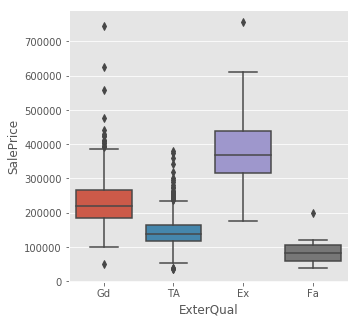

In [111]:
plt.figure(figsize=(5,5))
sns.boxplot(train.ExterQual,train.SalePrice)

In [112]:
labeledData=[2,1,3,0]
labeledData

[2, 1, 3, 0]

In [113]:
train.ExterQual.replace(unlabeledData,labeledData,inplace=True)

In [114]:
test.ExterQual.replace(unlabeledData,labeledData,inplace=True)

#### 2. ExterCond

In [115]:
unlabeledData=train.ExterCond.unique()
unlabeledData

array(['TA', 'Gd', 'Fa', 'Po', 'Ex'], dtype=object)

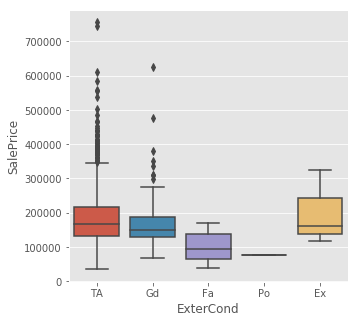

In [116]:
plt.figure(figsize=(5,5))
sns.boxplot(train.ExterCond,train.SalePrice)

In [117]:
labeledData=[2,3,1,0,4]
labeledData

[2, 3, 1, 0, 4]

In [118]:
train.ExterCond.replace(unlabeledData,labeledData,inplace=True)

In [119]:
test.ExterCond.replace(unlabeledData,labeledData,inplace=True)

#### 3. BsmtQual

In [120]:
unlabeledData=train.BsmtQual.unique()
unlabeledData

array(['Gd', 'TA', 'Ex', 'NoBasment', 'Fa'], dtype=object)

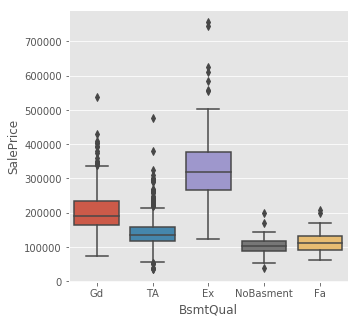

In [121]:
plt.figure(figsize=(5,5))
sns.boxplot(train.BsmtQual,train.SalePrice)

In [122]:
labeledData=[3,2,4,0,1]

In [123]:
train.BsmtQual.replace(unlabeledData,labeledData,inplace=True)

In [124]:
test.BsmtQual.replace(unlabeledData,labeledData,inplace=True)

#### 4. BsmtExposure

In [125]:
unlabeledData=train.BsmtExposure.unique()
unlabeledData

array(['No', 'Gd', 'Mn', 'Av', 'NoBasment'], dtype=object)

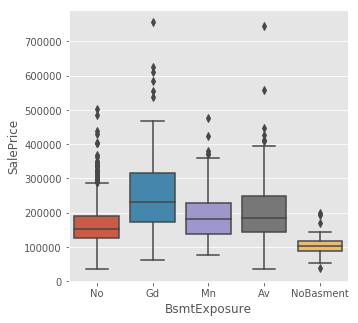

In [126]:
plt.figure(figsize=(5,5))
sns.boxplot(train.BsmtExposure,train.SalePrice)

In [127]:
labeledData=[1,4,2,3,0]

In [128]:
train.BsmtExposure.replace(unlabeledData,labeledData,inplace=True)

In [129]:
test.BsmtExposure.replace(unlabeledData,labeledData,inplace=True)

#### 5. BsmtFinType1

In [130]:
unlabeledData=train.BsmtFinType1.unique()
unlabeledData

array(['GLQ', 'ALQ', 'Unf', 'Rec', 'BLQ', 'NoBasment', 'LwQ'],
      dtype=object)

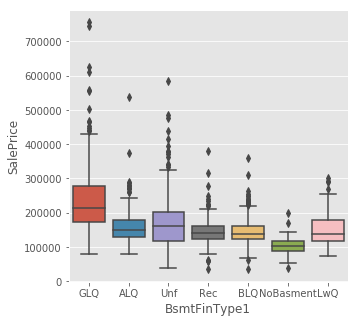

In [131]:
plt.figure(figsize=(5,5))
sns.boxplot(train.BsmtFinType1,train.SalePrice)

In [132]:
train.BsmtFinType1.value_counts()

Unf          428
GLQ          415
ALQ          220
BLQ          147
Rec          133
LwQ           74
NoBasment     37
Name: BsmtFinType1, dtype: int64

In [133]:
labeledData=[6,5,4,2,3,0,1]

In [134]:
train.BsmtFinType1.replace(unlabeledData,labeledData,inplace=True)

In [135]:
test.BsmtFinType1.replace(unlabeledData,labeledData,inplace=True)

#### 6. BsmtFinType2

In [136]:
unlabeledData=train.BsmtFinType2.unique()
unlabeledData

array(['Unf', 'BLQ', 'NoBasment', 'ALQ', 'Rec', 'LwQ', 'GLQ'],
      dtype=object)

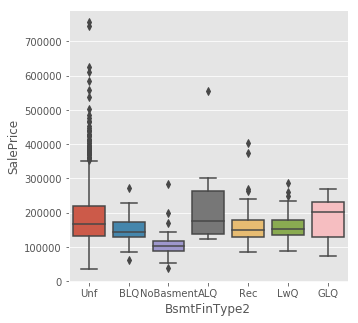

In [137]:
plt.figure(figsize=(5,5))
sns.boxplot(train.BsmtFinType2,train.SalePrice)

In [138]:
labeledData=[4,3,0,5,2,1,6]

In [139]:
train.BsmtFinType2.replace(unlabeledData,labeledData,inplace=True)

In [140]:
test.BsmtFinType2.replace(unlabeledData,labeledData,inplace=True)

#### 7. HeatingQC

In [141]:
unlabeledData=train.HeatingQC.unique()
unlabeledData

array(['Ex', 'Gd', 'TA', 'Fa', 'Po'], dtype=object)

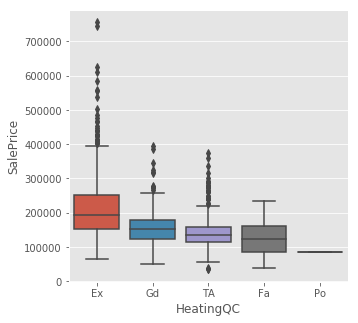

In [142]:
plt.figure(figsize=(5,5))
sns.boxplot(train.HeatingQC,train.SalePrice)

In [143]:
train[train.HeatingQC=='Po'].HeatingQC.count()

1

In [144]:
labeledData=[4,3,2,1,0]

In [145]:
train.HeatingQC.replace(unlabeledData,labeledData,inplace=True)

In [146]:
test.HeatingQC.replace(unlabeledData,labeledData,inplace=True)

#### 8. KitchenQual

In [147]:
unlabeledData=train.KitchenQual.unique()
unlabeledData

array(['Gd', 'TA', 'Ex', 'Fa'], dtype=object)

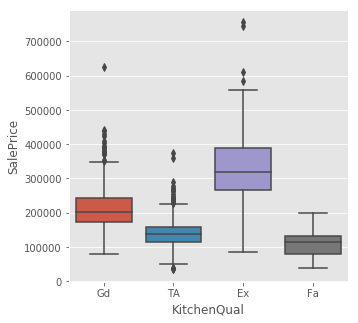

In [148]:
plt.figure(figsize=(5,5))
sns.boxplot(train.KitchenQual,train.SalePrice)

In [149]:
labeledData=[2,1,3,0]

In [150]:
train.KitchenQual.replace(unlabeledData,labeledData,inplace=True)

In [151]:
test.KitchenQual.replace(unlabeledData,labeledData,inplace=True)

#### 9. FireplaceQu

In [152]:
unlabeledData=train.FireplaceQu.unique()
unlabeledData

array(['NoFireplace', 'TA', 'Gd', 'Fa', 'Ex', 'Po'], dtype=object)

In [153]:
test.FireplaceQu.unique()

array(['NoFireplace', 'TA', 'Gd', 'Po', 'Fa', 'Ex'], dtype=object)

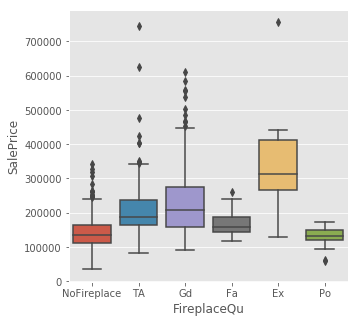

In [154]:
plt.figure(figsize=(5,5))
sns.boxplot(train.FireplaceQu,train.SalePrice)

In [155]:
labeledData=[0,3,4,2,5,1]

In [156]:
train.FireplaceQu.replace(unlabeledData,labeledData,inplace=True)

In [157]:
test.FireplaceQu.replace(unlabeledData,labeledData,inplace=True)

#### 10. GarageQual

In [158]:
unlabeledData=train.GarageQual.unique()
unlabeledData

array(['TA', 'Fa', 'Gd', 'NoGarage', 'Ex', 'Po'], dtype=object)

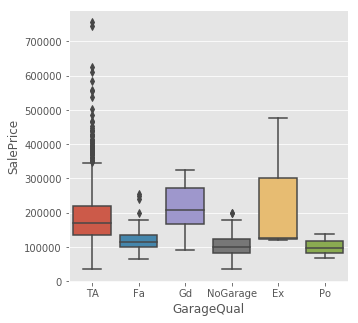

In [159]:
plt.figure(figsize=(5,5))
sns.boxplot(train.GarageQual,train.SalePrice)

In [160]:
train.GarageQual.value_counts()

TA          1305
NoGarage      81
Fa            48
Gd            14
Ex             3
Po             3
Name: GarageQual, dtype: int64

In [161]:
labeledData=[3,2,4,0,5,1]

In [162]:
train.GarageQual.replace(unlabeledData,labeledData,inplace=True)

In [163]:
test.GarageQual.replace(unlabeledData,labeledData,inplace=True)

#### 11. GarageCond

In [164]:
unlabeledData=train.GarageCond.unique()
unlabeledData

array(['TA', 'Fa', 'NoGarage', 'Gd', 'Po', 'Ex'], dtype=object)

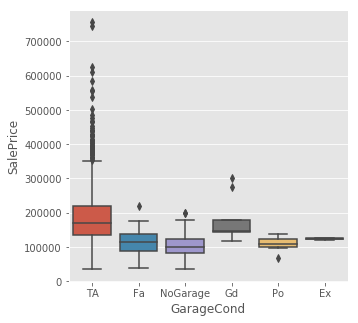

In [165]:
plt.figure(figsize=(5,5))
sns.boxplot(train.GarageCond,train.SalePrice)

In [166]:
train.GarageCond.value_counts()

TA          1320
NoGarage      81
Fa            35
Gd             9
Po             7
Ex             2
Name: GarageCond, dtype: int64

In [167]:
labeledData=[3,2,0,4,1,5]

In [168]:
train.GarageCond.replace(unlabeledData,labeledData,inplace=True)

In [169]:
test.GarageCond.replace(unlabeledData,labeledData,inplace=True)

#### 12. BsmtCond

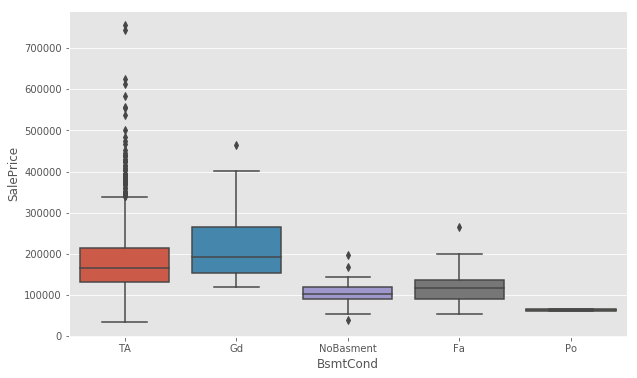

In [170]:
sns.boxplot(train.BsmtCond,train.SalePrice)

In [171]:
train.BsmtCond.value_counts()

TA           1305
Gd             65
Fa             45
NoBasment      37
Po              2
Name: BsmtCond, dtype: int64

In [172]:
test.BsmtCond.value_counts()

TA           1295
Fa             59
Gd             57
NoBasment      45
Po              3
Name: BsmtCond, dtype: int64

In [173]:
#Cant' drop poorbecause it is present in test data
#train.drop(train[train['BsmtCond']=='Po'].index,inplace=True)

In [174]:
#test.drop(test[test['BsmtCond']=='Po'].index,inplace=True)

In [175]:
train.BsmtCond.value_counts()

TA           1305
Gd             65
Fa             45
NoBasment      37
Po              2
Name: BsmtCond, dtype: int64

In [176]:
unlabeledData=train.BsmtCond.unique()
unlabeledData

array(['TA', 'Gd', 'NoBasment', 'Fa', 'Po'], dtype=object)

In [177]:
labeledData=[3,4,1,2,0]

In [178]:
train.BsmtCond.replace(unlabeledData,labeledData,inplace=True)

In [179]:
test.BsmtCond.replace(unlabeledData,labeledData,inplace=True)

In [180]:
train.BsmtCond.value_counts()

3    1305
4      65
2      45
1      37
0       2
Name: BsmtCond, dtype: int64

In [181]:
test.BsmtCond.value_counts()

3    1295
2      59
4      57
1      45
0       3
Name: BsmtCond, dtype: int64

## 3. One Hot Encoding
Categorical features which can't be ranked are encoded using this technique

In [182]:
categorical_features=findCatFeatures(train)
cat_features_col=categorical_features.columns
len(cat_features_col)

23

In [183]:
cat_features_col

Index(['MSZoning', 'Alley', 'LotShape', 'LandContour', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'BldgType', 'HouseStyle',
       'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation',
       'CentralAir', 'Electrical', 'Functional', 'GarageType', 'GarageFinish',
       'PavedDrive', 'Fence', 'SaleType'],
      dtype='object')

In [184]:
categorical_features_test=findCatFeatures(test)
len(categorical_features_test.columns)

23

In [185]:
for col in cat_features_col:
    print(train[col].value_counts(),'\n\n')

RL         1146
RM          218
FV           65
RH           16
C (all)       9
Name: MSZoning, dtype: int64 


NoAlley    1363
Grvl         50
Pave         41
Name: Alley, dtype: int64 


Reg    921
IR1    483
IR2     41
IR3      9
Name: LotShape, dtype: int64 


Lvl    1309
Bnk      61
HLS      50
Low      34
Name: LandContour, dtype: int64 


Inside     1047
Corner      262
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64 


Gtl    1377
Mod      64
Sev      13
Name: LandSlope, dtype: int64 


NAmes      225
CollgCr    150
OldTown    113
Edwards     98
Somerst     86
Gilbert     79
NridgHt     75
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     48
NoRidge     41
Timber      38
IDOTRR      36
ClearCr     28
SWISU       25
StoneBr     25
Blmngtn     17
MeadowV     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64 


Norm      1257
Feedr       80
Artery      48
RRAn        26

####  1. LotShape

In [186]:
train.LotShape.value_counts()

Reg    921
IR1    483
IR2     41
IR3      9
Name: LotShape, dtype: int64

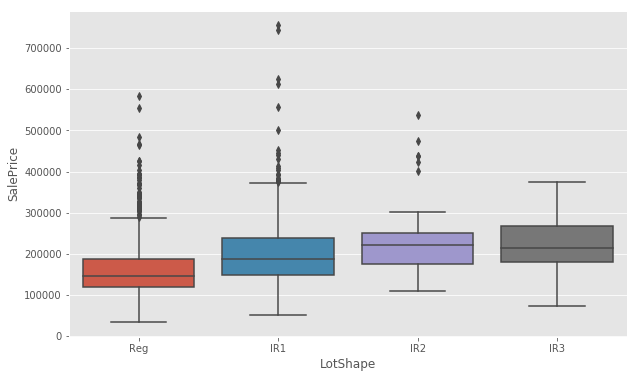

In [187]:
sns.boxplot(train.LotShape,train.SalePrice)

In [188]:
train.loc[train.LotShape!='Reg','LotShape']='Ireg'

In [189]:
test.loc[test.LotShape!='Reg','LotShape']='Ireg'

In [190]:
train=pd.get_dummies(train, columns=['LotShape'],drop_first=True,prefix='LotShape')

In [191]:
test=pd.get_dummies(test, columns=['LotShape'],drop_first=True,prefix='LotShape')

#### 2. LandSlope

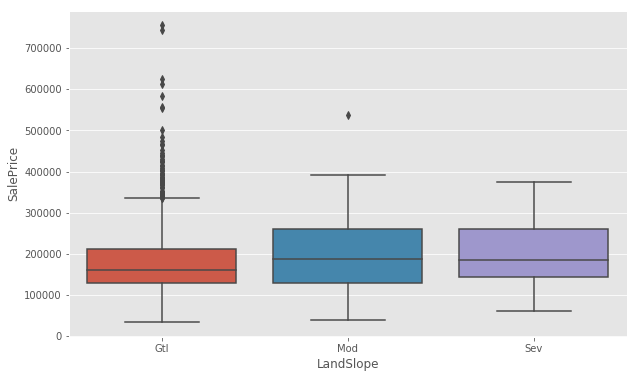

In [192]:
sns.boxplot(train.LandSlope,train.SalePrice)

In [193]:
train.LandSlope.value_counts()

Gtl    1377
Mod      64
Sev      13
Name: LandSlope, dtype: int64

In [194]:
test.LandSlope.value_counts()

Gtl    1396
Mod      60
Sev       3
Name: LandSlope, dtype: int64

In [195]:
train.loc[train.LandSlope!='Gtl','LandSlope']='Mod'

In [196]:
test.loc[test.LandSlope!='Gtl','LandSlope']='Mod'

In [197]:
train=pd.get_dummies(train,columns=['LandSlope'],drop_first=True,prefix='LandSlope')

In [198]:
test=pd.get_dummies(test,columns=['LandSlope'],drop_first=True,prefix='LandSlope')

#### 3.Neighbourhood

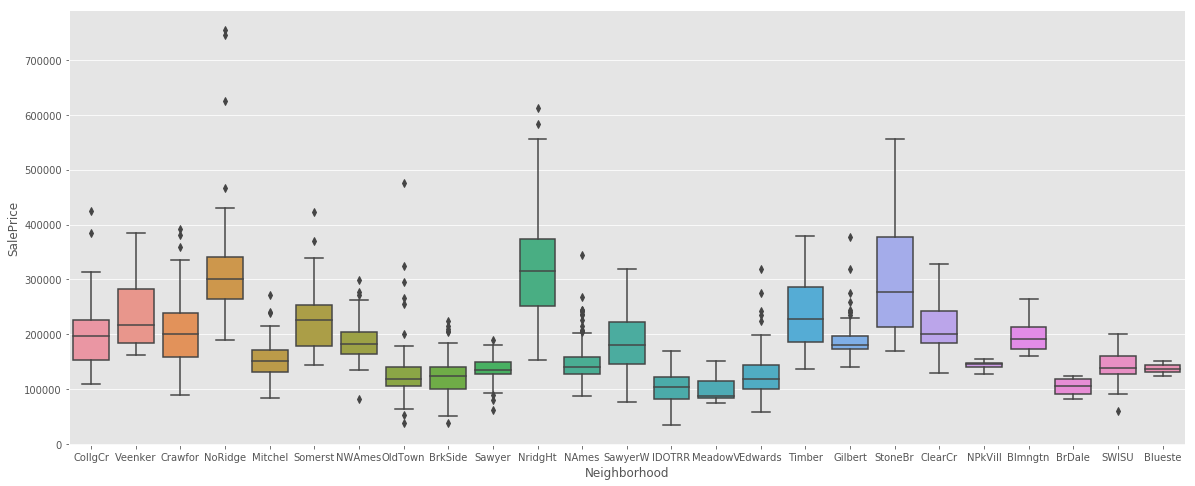

In [199]:
plt.figure(figsize=(20,8))
sns.boxplot(train.Neighborhood,train.SalePrice)

In [200]:
train.Neighborhood.value_counts().count()

25

In [201]:
train.drop('Neighborhood',axis=1,inplace=True)

In [202]:
test.drop('Neighborhood',axis=1,inplace=True)

#### 4. GarageFinish

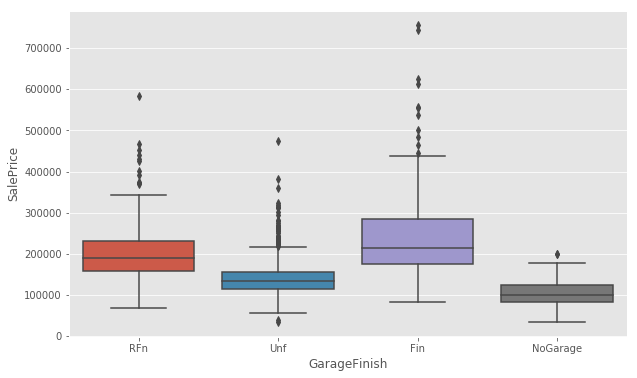

In [203]:
sns.boxplot(train.GarageFinish,train.SalePrice)

In [204]:
train.GarageFinish.value_counts()

Unf         605
RFn         420
Fin         348
NoGarage     81
Name: GarageFinish, dtype: int64

In [205]:
train.loc[train.GarageFinish=='RFn','GarageFinish']='Fin'

In [206]:
test.loc[test.GarageFinish=='RFn','GarageFinish']='Fin'

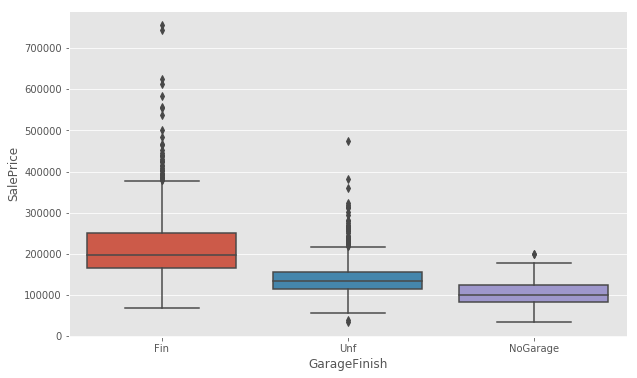

In [207]:
sns.boxplot(train.GarageFinish,train.SalePrice)

In [208]:
train=pd.get_dummies(train,columns=['GarageFinish'],prefix='GarageFinish')

In [209]:
test=pd.get_dummies(test,columns=['GarageFinish'],prefix='GarageFinish')

In [210]:
train.drop(columns=['GarageFinish_NoGarage'],inplace=True)

In [211]:
test.drop(columns=['GarageFinish_NoGarage'],inplace=True)

#### 5. LotConfig

In [212]:
train.LotConfig.value_counts()

Inside     1047
Corner      262
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64

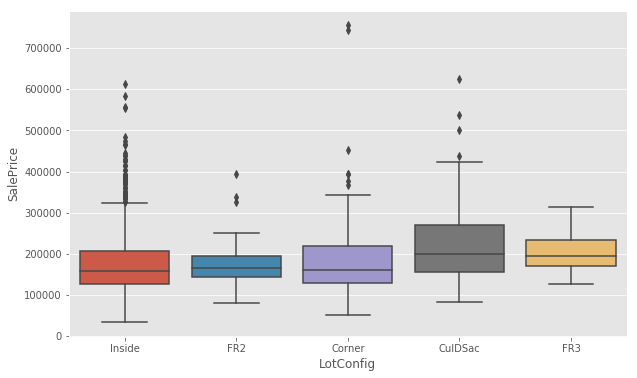

In [213]:
sns.boxplot(train.LotConfig,train.SalePrice)

In [214]:
train.loc[train.LotConfig=='FR3','LotConfig']='Type2'
train.loc[train.LotConfig=='CullDSac','LotConfig']='Type2'
train.loc[train.LotConfig=='FR2','LotConfig']='Type1'
train.loc[train.LotConfig=='Inside','LotConfig']='Type1'
train.loc[train.LotConfig=='Corner','LotConfig']='Type1'
train['LotConfig']=pd.get_dummies(train.LotConfig,drop_first=True)

In [215]:
test.loc[test.LotConfig=='FR3','LotConfig']='Type2'
test.loc[test.LotConfig=='CullDSac','LotConfig']='Type2'
test.loc[test.LotConfig=='FR2','LotConfig']='Type1'
test.loc[test.LotConfig=='Inside','LotConfig']='Type1'
test.loc[test.LotConfig=='Corner','LotConfig']='Type1'
test['LotConfig']=pd.get_dummies(test.LotConfig,drop_first=True)

In [216]:
train.LotConfig.value_counts()

1    1356
0      98
Name: LotConfig, dtype: int64

In [217]:
test.LotConfig.value_counts()

1    1367
0      92
Name: LotConfig, dtype: int64

#### 6. LandContour

In [218]:
train.LandContour.value_counts()

Lvl    1309
Bnk      61
HLS      50
Low      34
Name: LandContour, dtype: int64

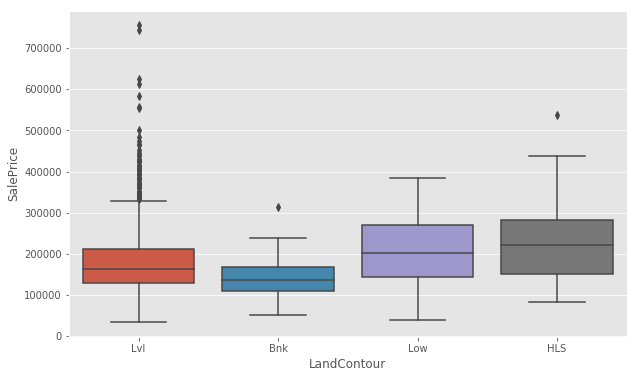

In [219]:
sns.boxplot(train.LandContour,train.SalePrice)

In [220]:
train.loc[train.LandContour=='HLS','LandContour']='Low'

In [221]:
test.loc[test.LandContour=='HLS','LandContour']='Low'

In [222]:
train=pd.get_dummies(train,columns=['LandContour'],drop_first=True,prefix='LandContour')

In [223]:
test=pd.get_dummies(test,columns=['LandContour'],drop_first=True,prefix='LandContour')

#### 7. Alley

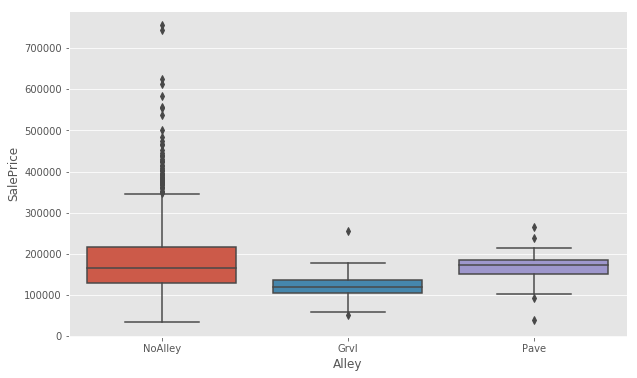

In [224]:
sns.boxplot(train.Alley,train.SalePrice)

In [225]:
train=pd.get_dummies(train,columns=['Alley'],prefix='Alley',drop_first=True)

In [226]:
test=pd.get_dummies(test,columns=['Alley'],prefix='Alley',drop_first=True)

#### 8. MSZoning

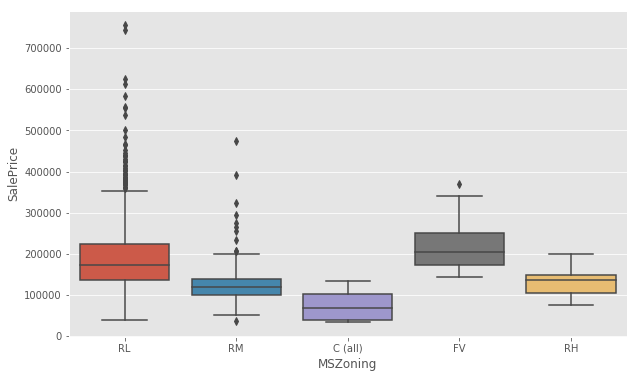

In [227]:
sns.boxplot(train.MSZoning,train.SalePrice)

In [228]:
train.MSZoning.value_counts()

RL         1146
RM          218
FV           65
RH           16
C (all)       9
Name: MSZoning, dtype: int64

In [229]:
train.loc[train.MSZoning=='RM','MSZoning']='RH'

In [230]:
test.loc[test.MSZoning=='RM','MSZoning']='RH'

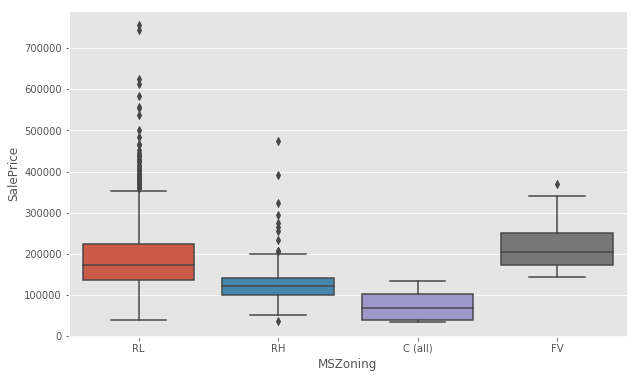

In [231]:
sns.boxplot(train.MSZoning,train.SalePrice)

In [232]:
train=pd.get_dummies(train,columns=['MSZoning'],prefix='MSZoning',drop_first=True)

In [233]:
test=pd.get_dummies(test,columns=['MSZoning'],prefix='MSZoning',drop_first=True)

#### 9. Condition1

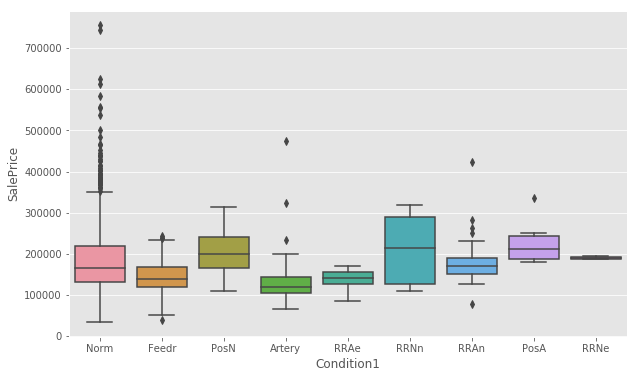

In [234]:
sns.boxplot(train.Condition1,train.SalePrice)

In [235]:
train.Condition1.value_counts()

Norm      1257
Feedr       80
Artery      48
RRAn        26
PosN        17
RRAe        11
PosA         8
RRNn         5
RRNe         2
Name: Condition1, dtype: int64

In [236]:
train.Condition1.replace(['RRNe','RRNn','PosA'],['Others','Others','Others'],inplace=True)

In [237]:
test.Condition1.replace(['RRNe','RRNn','PosA'],['Others','Others','Others'],inplace=True)

In [238]:
train.Condition1.value_counts()

Norm      1257
Feedr       80
Artery      48
RRAn        26
PosN        17
Others      15
RRAe        11
Name: Condition1, dtype: int64

In [239]:
test.Condition1.value_counts()

Norm      1251
Feedr       83
Artery      44
RRAn        24
PosN        20
Others      20
RRAe        17
Name: Condition1, dtype: int64

In [240]:
train=pd.get_dummies(train,columns=['Condition1'],prefix='Condition1',drop_first=True)

In [241]:
test=pd.get_dummies(test,columns=['Condition1'],prefix='Condition1',drop_first=True)

#### 10. BldgType

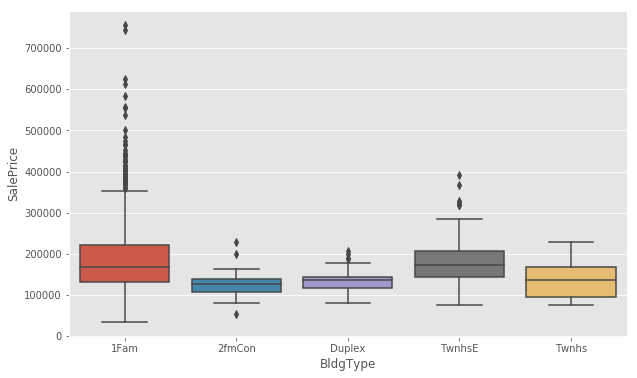

In [242]:
sns.boxplot(train.BldgType,train.SalePrice)

In [243]:
train.loc[train.BldgType=='Duplex','BldgType']='2fmCon'

In [244]:
test.loc[test.BldgType=='Duplex','BldgType']='2fmCon'

In [245]:
train.BldgType.value_counts()

1Fam      1215
TwnhsE     114
2fmCon      82
Twnhs       43
Name: BldgType, dtype: int64

In [246]:
train=pd.get_dummies(train,columns=['BldgType'],prefix='BldgType',drop_first=True)

In [247]:
test=pd.get_dummies(test,columns=['BldgType'],prefix='BldgType',drop_first=True)

#### 11. HouseStyle

In [248]:
train.HouseStyle.value_counts()

1Story    722
2Story    443
1.5Fin    154
SLvl       65
SFoyer     37
1.5Unf     14
2.5Unf     11
2.5Fin      8
Name: HouseStyle, dtype: int64

In [249]:
test.HouseStyle.value_counts()

1Story    745
2Story    427
1.5Fin    160
SLvl       63
SFoyer     46
2.5Unf     13
1.5Unf      5
Name: HouseStyle, dtype: int64

In [250]:
train.drop(train[train['HouseStyle']=='2.5Fin'].index,inplace=True)

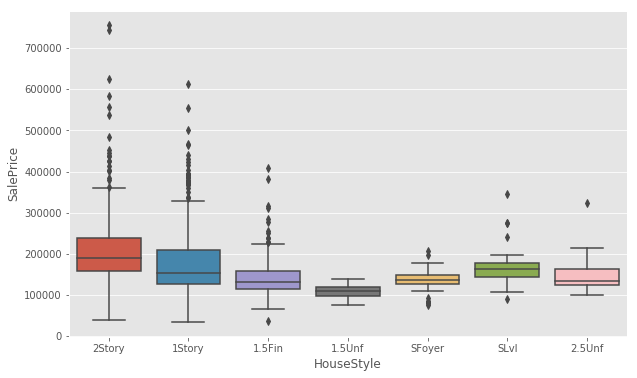

In [251]:
sns.boxplot(train.HouseStyle,train.SalePrice)

In [252]:
train.shape

(1446, 85)

In [253]:
train=pd.get_dummies(train,columns=['HouseStyle'],prefix='HouseStyle',drop_first=True)

In [254]:
test=pd.get_dummies(test,columns=['HouseStyle'],prefix='HouseStyle',drop_first=True)

In [255]:
train.shape

(1446, 90)

In [256]:
test.shape

(1459, 89)

####  12.  RoofStyle

In [257]:
train.RoofStyle.value_counts()

Gable      1132
Hip         281
Flat         13
Gambrel      11
Mansard       7
Shed          2
Name: RoofStyle, dtype: int64

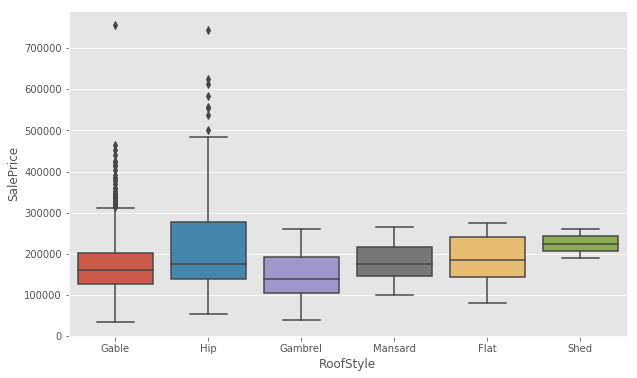

In [258]:
sns.boxplot(train.RoofStyle,train.SalePrice)

In [259]:
train=pd.get_dummies(train,columns=['RoofStyle'],prefix='RoofStyle',drop_first=True)

In [260]:
test=pd.get_dummies(test,columns=['RoofStyle'],prefix='RoofStyle',drop_first=True)

In [261]:
train.shape

(1446, 94)

#### 13. Exterior1st

In [262]:
train.Exterior1st.value_counts()

VinylSd    513
HdBoard    222
MetalSd    217
Wd Sdng    201
Plywood    108
CemntBd     58
BrkFace     50
WdShing     26
Stucco      24
AsbShng     20
BrkComm      2
Stone        2
CBlock       1
ImStucc      1
AsphShn      1
Name: Exterior1st, dtype: int64

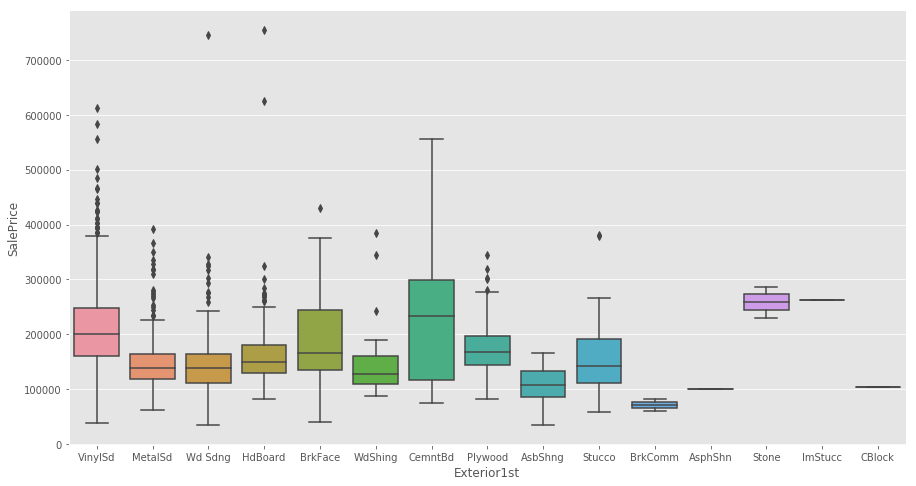

In [263]:
plt.figure(figsize=(15,8))
sns.boxplot(train.Exterior1st,train.SalePrice)

In [264]:
train.Exterior1st.replace(['MetalSd','Wd Sdng','BrkComm','AsphShn','Stone','ImStucc','CBlock'],
                          ['Siding','Siding','Others','Others','Others','Others','Others'],
                          inplace=True)

In [265]:
test.Exterior1st.replace(['MetalSd','Wd Sdng','BrkComm','AsphShn','Stone','ImStucc','CBlock'],
                          ['Siding','Siding','Others','Others','Others','Others','Others'],
                          inplace=True)

In [266]:
train.Exterior1st.value_counts()

VinylSd    513
Siding     418
HdBoard    222
Plywood    108
CemntBd     58
BrkFace     50
WdShing     26
Stucco      24
AsbShng     20
Others       7
Name: Exterior1st, dtype: int64

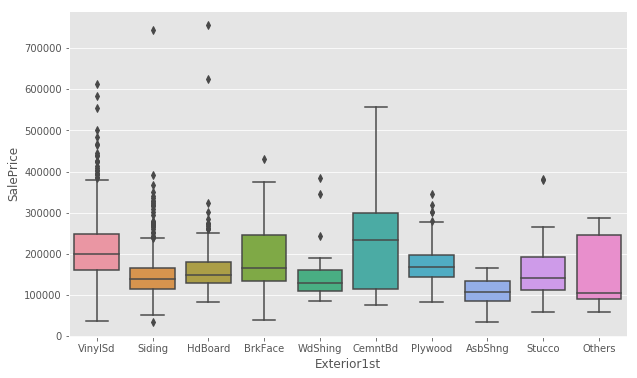

In [267]:
sns.boxplot(train.Exterior1st,train.SalePrice)

In [268]:
train.shape

(1446, 94)

In [269]:
train=pd.get_dummies(train,columns=['Exterior1st'],prefix='Exterior1st',drop_first=True)

In [270]:
test=pd.get_dummies(test,columns=['Exterior1st'],prefix='Exterior1st',drop_first=True)

In [271]:
train.shape

(1446, 102)

#### 14. Exterior2nd

In [272]:
train.Exterior2nd.value_counts()

VinylSd    502
MetalSd    211
HdBoard    207
Wd Sdng    193
Plywood    141
CmentBd     57
Wd Shng     38
BrkFace     25
Stucco      25
AsbShng     20
ImStucc     10
Brk Cmn      7
Stone        5
AsphShn      3
Other        1
CBlock       1
Name: Exterior2nd, dtype: int64

In [273]:
test.Exterior2nd.value_counts()

VinylSd    511
MetalSd    233
HdBoard    199
Wd Sdng    194
Plywood    128
CmentBd     66
Wd Shng     43
BrkFace     22
Stucco      21
AsbShng     18
Brk Cmn     15
ImStucc      5
CBlock       2
AsphShn      1
Stone        1
Name: Exterior2nd, dtype: int64

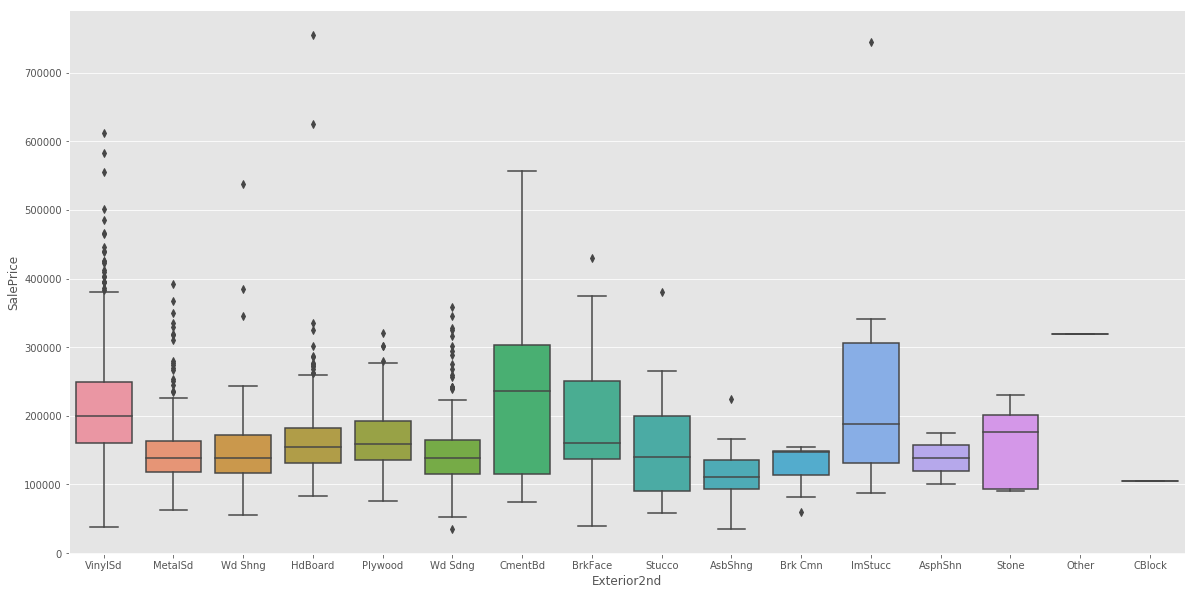

In [274]:
plt.figure(figsize=(20,10))
sns.boxplot(train.Exterior2nd,train.SalePrice)

In [275]:
# Clubbing 4.9 percent data together as others

train.Exterior2nd.replace(to_replace=['BrkFace','AsbShng','Brk Cmn','ImStucc','Stone','CBlock','AsphShn'],
                          value=['Other','Other','Other','Other','Other','Other','Other'],
                          inplace=True)

In [276]:

test.Exterior2nd.replace(to_replace=['BrkFace','AsbShng','Brk Cmn','ImStucc','Stone','CBlock','AsphShn'],
                          value=['Other','Other','Other','Other','Other','Other','Other'],
                          inplace=True)

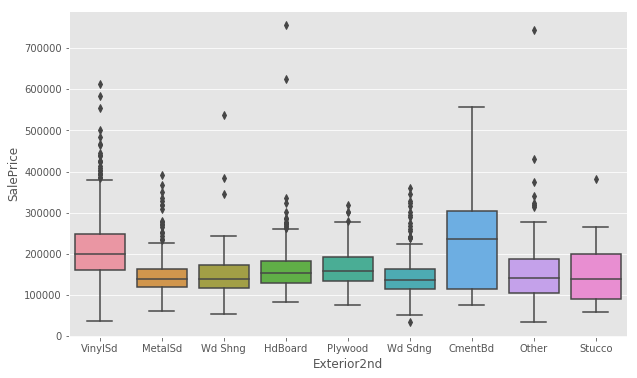

In [277]:
sns.boxplot(train.Exterior2nd,train.SalePrice)

In [278]:
train=pd.get_dummies(train,columns=['Exterior2nd'],prefix='Exterior2nd',drop_first=True)

In [279]:
test=pd.get_dummies(test,columns=['Exterior2nd'],prefix='Exterior2nd',drop_first=True)

#### 15. MasVnrType

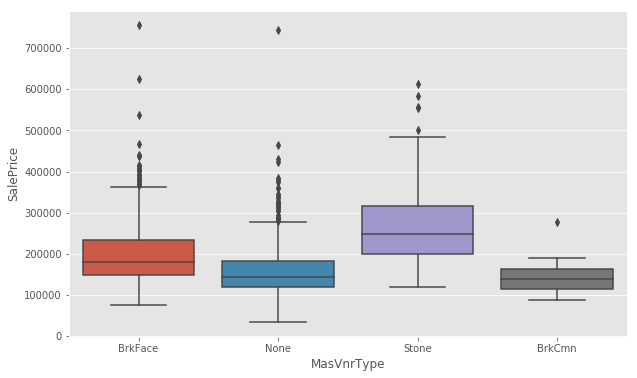

In [280]:
sns.boxplot(train.MasVnrType,train.SalePrice)

In [281]:
train=pd.get_dummies(train,columns=['MasVnrType'],prefix='MasVnrType',drop_first=True)

In [282]:
test=pd.get_dummies(test,columns=['MasVnrType'],prefix='MasVnrType',drop_first=True)

#### 16. Foundation

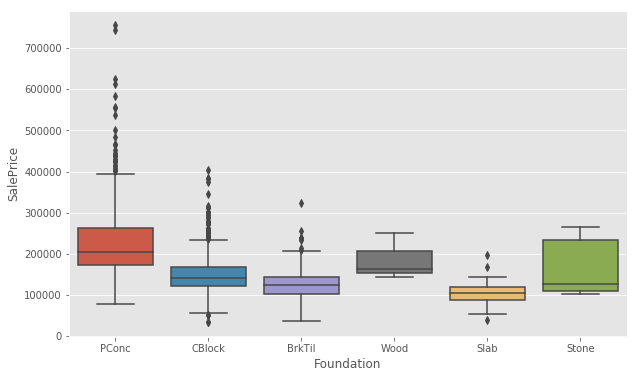

In [283]:
sns.boxplot(train.Foundation,train.SalePrice)

In [284]:
train.Foundation.value_counts()

PConc     641
CBlock    630
BrkTil    142
Slab       24
Stone       6
Wood        3
Name: Foundation, dtype: int64

In [285]:
train=pd.get_dummies(train,columns=['Foundation'],prefix='Foundation',drop_first=True,)

In [286]:
test=pd.get_dummies(test,columns=['Foundation'],prefix='Foundation',drop_first=True,)

In [287]:
train.shape

(1446, 115)

In [288]:
test.shape

(1459, 114)

#### 17. CentralAir

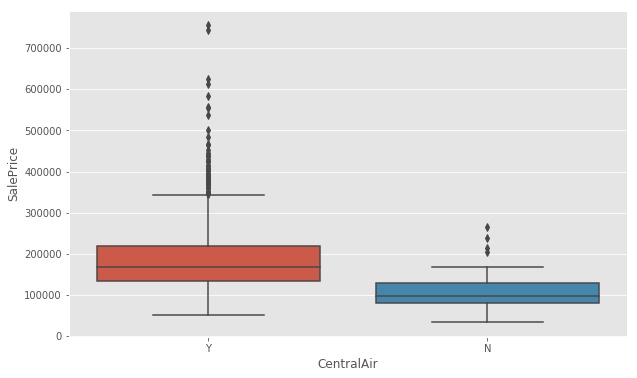

In [289]:
sns.boxplot(train.CentralAir,train.SalePrice)

In [290]:
train=pd.get_dummies(train,columns=['CentralAir'],prefix='CentralAir',drop_first=True)

In [291]:
test=pd.get_dummies(test,columns=['CentralAir'],prefix='CentralAir',drop_first=True)

In [292]:
train.shape

(1446, 115)

#### 18. Electrical

In [293]:
train.Electrical.value_counts()

SBrkr    1322
FuseA      93
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [294]:
test.Electrical.value_counts()

SBrkr    1337
FuseA      94
FuseF      23
FuseP       5
Name: Electrical, dtype: int64

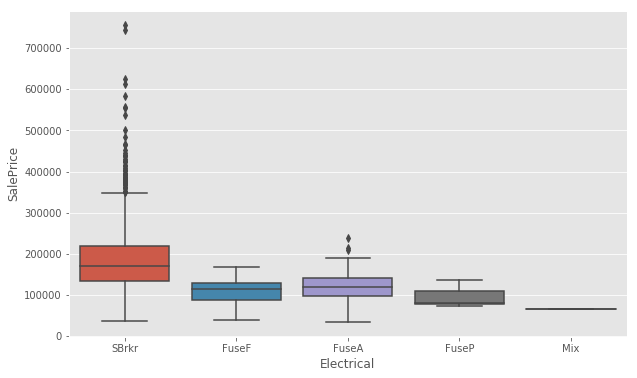

In [295]:
sns.boxplot(train.Electrical,train.SalePrice)

In [296]:
train.drop((train[train['Electrical']=='Mix'].index),axis=0,inplace=True)

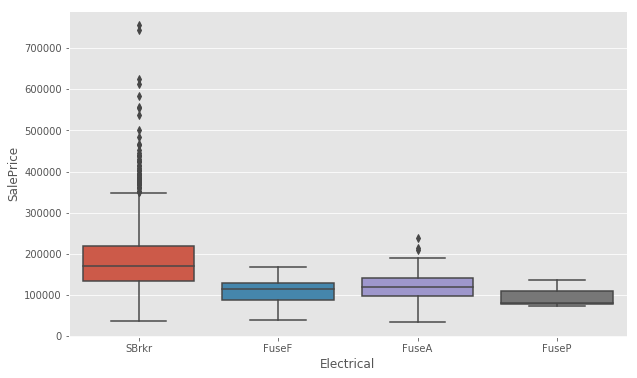

In [297]:
sns.boxplot(train.Electrical,train.SalePrice)

In [298]:
train=pd.get_dummies(train,columns=['Electrical'],prefix='Electrical',drop_first=True)

In [299]:
test=pd.get_dummies(test,columns=['Electrical'],prefix='Electrical',drop_first=True)

#### 19. Functional

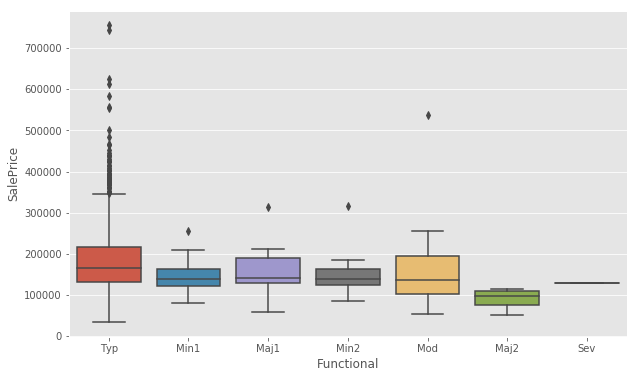

In [300]:
sns.boxplot(train.Functional,train.SalePrice)

In [301]:
train.Functional.value_counts()

Typ     1347
Min2      34
Min1      30
Mod       15
Maj1      14
Maj2       4
Sev        1
Name: Functional, dtype: int64

In [302]:
test.Functional.value_counts()

Typ     1359
Min2      36
Min1      34
Mod       20
Maj1       5
Maj2       4
Sev        1
Name: Functional, dtype: int64

In [303]:
#Cant' drop sev because test data contains sev, 
#So we will add sev with mod
train.loc[train.Functional=='Sev','Functional']='Mod'

In [304]:
test.loc[test['Functional']=='Sev','Functional']='Mod'

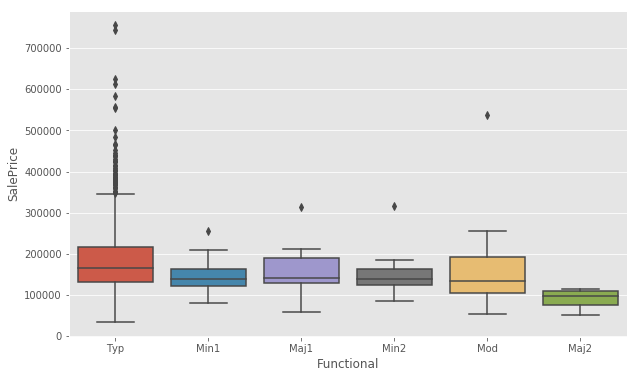

In [305]:
sns.boxplot(train.Functional,train.SalePrice)

In [306]:
train=pd.get_dummies(train,columns=['Functional'],prefix='Functional',drop_first=True)

In [307]:
test=pd.get_dummies(test,columns=['Functional'],prefix='Functional',drop_first=True)

#### 20. GarageType

In [308]:
train.GarageType.value_counts()

Attchd      866
Detchd      381
BuiltIn      87
NoGarage     79
Basment      18
CarPort       9
2Types        5
Name: GarageType, dtype: int64

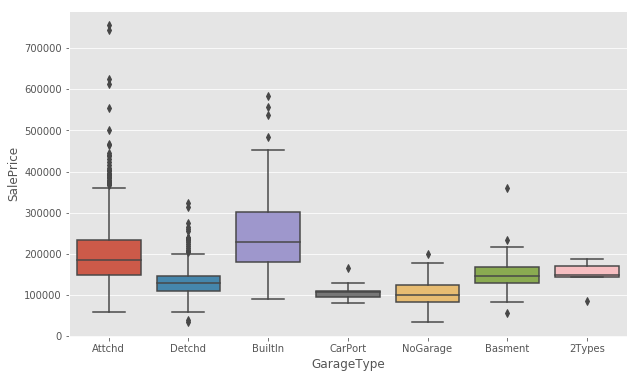

In [309]:
sns.boxplot(train.GarageType,train.SalePrice)

In [310]:
train['GarageType']=train.GarageType.replace('NoGarage','CarPort')

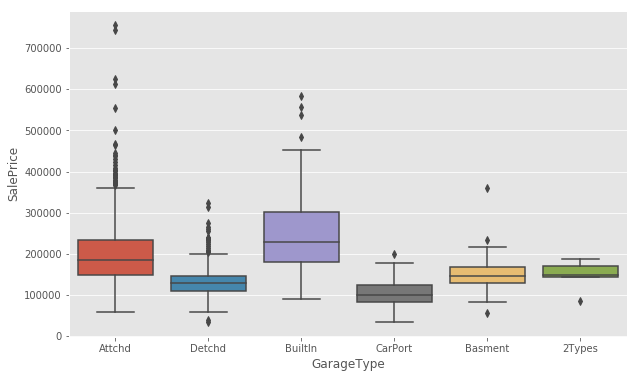

In [311]:
sns.boxplot(train.GarageType,train.SalePrice)

In [312]:
test['GarageType']=test.GarageType.replace('NoGarage','CarPort')

In [313]:
train.shape

(1445, 121)

In [314]:
train=pd.get_dummies(train,columns=['GarageType'],prefix='GarageType',drop_first=True)

In [315]:
test=pd.get_dummies(test,columns=['GarageType'],prefix='GarageType',drop_first=True)

#### 21. PavedDrive

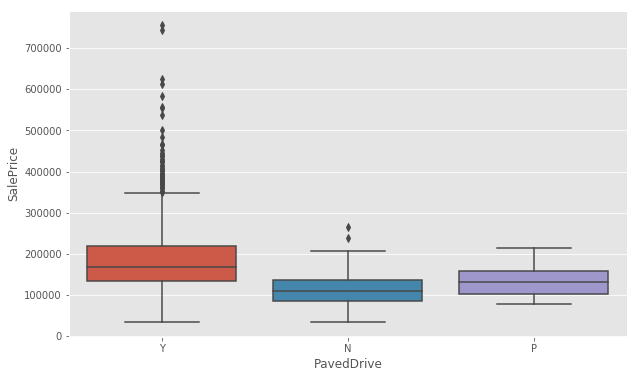

In [316]:
sns.boxplot(train.PavedDrive,train.SalePrice)

In [317]:
train=pd.get_dummies(train,columns=['PavedDrive'],prefix='PavedDrive',drop_first=True)

In [318]:
test=pd.get_dummies(test,columns=['PavedDrive'],prefix='PavedDrive',drop_first=True)

#### 22. Fence

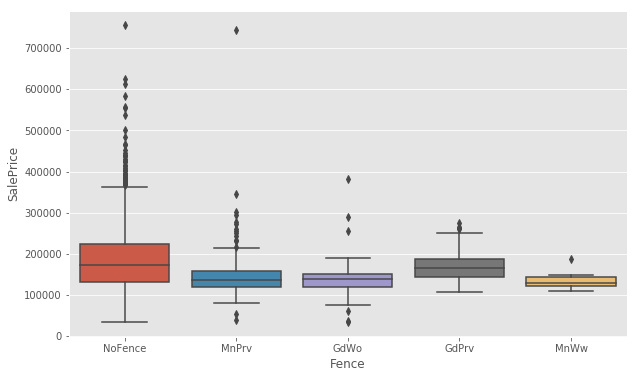

In [319]:
sns.boxplot(train.Fence,train.SalePrice)

In [320]:
train.Fence.value_counts()

NoFence    1166
MnPrv       156
GdPrv        58
GdWo         54
MnWw         11
Name: Fence, dtype: int64

In [321]:
train=pd.get_dummies(train,columns=['Fence'],prefix='Fence',drop_first=True)

In [322]:
test=pd.get_dummies(test,columns=['Fence'],prefix='Fence',drop_first=True)

#### 23. SaleType

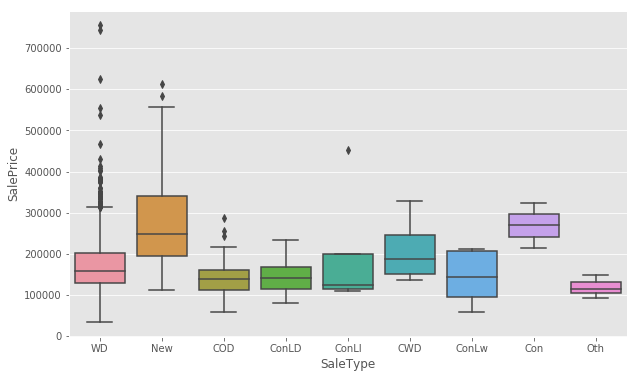

In [323]:
sns.boxplot(train.SaleType,train.SalePrice)

In [324]:
train.shape

(1445, 129)

In [325]:
train=pd.get_dummies(train,columns=['SaleType'],prefix='SaleType',drop_first=True)

In [326]:
test=pd.get_dummies(test,columns=['SaleType'],prefix='SaleType',drop_first=True)

In [327]:
train.shape

(1445, 136)

In [328]:
print(train.shape)
print(test.shape)

(1445, 136)
(1459, 135)


In [329]:
trainTarget=pd.DataFrame(train.SalePrice)

In [330]:
train.drop(columns=['SalePrice'],axis=1,inplace=True)

In [331]:
for col in test.columns:
    if(col not in train.columns):
        print(col)

In [332]:
for col in train.columns:
    if(col not in test.columns):
        print(col)

# Feature Scaling

In [333]:
from sklearn.preprocessing import MinMaxScaler

In [334]:
scaler=MinMaxScaler()

In [335]:
scaler.fit_transform(train)

C:\Users\vaibhavgupta02\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


array([[0.00000000e+00, 2.35294118e-01, 2.07667732e-01, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       [6.85400960e-04, 0.00000000e+00, 2.55591054e-01, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       [1.37080192e-03, 2.35294118e-01, 2.17252396e-01, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       ...,
       [9.98629198e-01, 2.94117647e-01, 2.10862620e-01, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       [9.99314599e-01, 0.00000000e+00, 2.17252396e-01, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 0.00000000e+00, 2.39616613e-01, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00]])

In [336]:
scaler.transform(test)

array([[1.0006854 , 0.        , 0.25559105, ..., 0.        , 0.        ,
        1.        ],
       [1.0013708 , 0.        , 0.25878594, ..., 0.        , 0.        ,
        1.        ],
       [1.0020562 , 0.23529412, 0.23642173, ..., 0.        , 0.        ,
        1.        ],
       ...,
       [1.9986292 , 0.        , 0.51118211, ..., 0.        , 0.        ,
        1.        ],
       [1.9993146 , 0.38235294, 0.19808307, ..., 0.        , 0.        ,
        1.        ],
       [2.        , 0.23529412, 0.23642173, ..., 0.        , 0.        ,
        1.        ]])

In [337]:
train.drop(columns=['Id'],axis=1,inplace=True)

In [338]:
ansID=test.Id

In [339]:
test.drop(columns=['Id'],axis=1,inplace=True)

# Saving File To CSV

In [340]:
train.to_csv(r'C:\Users\vaibhavgupta02\Desktop\Intern\Problem Statment 1\Data\visualizedTrainData.csv',index=None,header=True)

In [341]:
test.to_csv(r'C:\Users\vaibhavgupta02\Desktop\Intern\Problem Statment 1\Data\visualizedTestData.csv',index=None,header=True)

In [342]:
trainTarget.to_csv(r'C:\Users\vaibhavgupta02\Desktop\Intern\Problem Statment 1\Data\visualizedTargetData.csv',index=None,header=True)

In [345]:
ansID.to_csv(r'C:\Users\vaibhavgupta02\Desktop\Intern\Problem Statment 1\Data\ansID.csv',index=None,header=True)